In [ ]:
%%capture

!pip install geopandas folium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from scipy import stats
import missingno as msno
from IPython.display import display, HTML

In [ ]:
# Set style parameters
plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Inclusivity/My data/'

In [ ]:
def print_header(title):
    display(HTML(f"<h2>{title}</h2>"))

In [ ]:
def load_and_examine_file(filepath, sheet_name=0):
    """Load file and provide basic information about it."""
    print(f"Loading: {filepath.split('/')[-1]}")

    try:
        if filepath.endswith('.csv'):
            try:
                df = pd.read_csv(filepath)
            except UnicodeDecodeError:
                # Try with different encoding if utf-8 fails
                df = pd.read_csv(filepath, encoding='latin1')
        elif filepath.endswith(('.xls', '.xlsx')):
            df = pd.read_excel(filepath, sheet_name=sheet_name)
        else:
            print(f"Unsupported file format: {filepath}")
            return None

        print(f"✓ Successfully loaded with shape: {df.shape}")
        return df

    except Exception as e:
        print(f"✗ Error loading file: {str(e)}")
        return None

In [ ]:
def analyze_dataframe(df, name):
    """Analyze a dataframe and print key information."""
    print_header(f"Analysis of {name}")

    print(f"DataFrame shape: {df.shape} (rows, columns)")

    # Display first few rows
    print("\nSample data:")
    display(df.head())

    # Check for missing values
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percent Missing': missing_percent
    })
    print("\nMissing values:")
    display(missing_info[missing_info['Missing Values'] > 0])

    # Visualize missing values
    if missing.sum() > 0:
        plt.figure(figsize=(10, 6))
        msno.matrix(df)
        plt.title(f'Missing Value Patterns in {name}')
        plt.tight_layout()
        plt.show()

    # Dataframe info
    print("\nColumn info:")
    df.info()

    # For numerical columns, show summary statistics
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 0:
        print("\nNumerical column statistics:")
        display(df[num_cols].describe())

    # For categorical columns, show value counts
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print("\nCategorical column information:")
        for col in cat_cols[:min(5, len(cat_cols))]:  # Show first 5 only to avoid clutter
            print(f"\nValue counts for {col}:")
            display(df[col].value_counts().head(10))

    return df

In [ ]:
def visualize_categorical_column(df, column, title=None, figsize=(10, 6)):
    """Visualize a categorical column with a bar chart."""
    plt.figure(figsize=figsize)

    if df[column].nunique() > 10:
        top_n = df[column].value_counts().head(10)
        sns.barplot(x=top_n.index, y=top_n.values)
        plt.title(f'Top 10 values for {title or column}')
    else:
        sns.countplot(y=column, data=df, order=df[column].value_counts().index)
        plt.title(f'Distribution of {title or column}')

    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_numerical_column(df, column, title=None, bins=30, figsize=(10, 6)):
    """Visualize a numerical column with histograms and box plots."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    # Histogram
    sns.histplot(df[column].dropna(), bins=bins, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {title or column}')

    # Box plot
    sns.boxplot(x=df[column].dropna(), ax=ax2)
    ax2.set_title(f'Box plot of {title or column}')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Summary statistics for {column}:")
    display(df[column].describe())

In [ ]:
def create_correlation_heatmap(df, cols=None, method='pearson', title="Correlation Matrix", figsize=(12, 10)):
    """Create a correlation heatmap for the given columns."""
    if cols is None:
        # Use all numeric columns
        cols = df.select_dtypes(include=['int64', 'float64']).columns

    corr = df[cols].corr(method=method)

    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 8})

    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    return corr

Loading: DatabankWide (1).xlsx
✓ Successfully loaded with shape: (658, 1232)


DataFrame shape: (658, 1232) (rows, columns)

Sample data:


Country name Country code  Year  Adult populaiton  \
0  Afghanistan          AFG  2011       15124473.00   
1  Afghanistan          AFG  2014       17300802.00   
2  Afghanistan          AFG  2017       19718214.00   
3  Afghanistan          AFG  2021       22647496.00   
4      Albania          ALB  2011        2258899.75   

                                          Region         Income group  \
0                                     South Asia           Low income   
1                                     South Asia           Low income   
2                                     South Asia           Low income   
3                                     South Asia           Low income   
4  Europe & Central Asia (excluding high income)  Upper middle income   

   Account (% age 15+)  Financial institution account (% age 15+)  \
0             0.090050                                   0.090050   
1             0.099610                                   0.099610   
2             0.148933                                   0.145471   
3             0.096538                                   0.096538   
4             0.282681                                   0.282681   

   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)  \
0                                                NaN                                                                        
1                                                NaN                                                                        
2                                                NaN                                                                        
3                                                NaN                                                                        
4                                                NaN                                                                        

   First financial institution account ever was opened to receive a wage payment (% age 15+)  \
0                                                NaN                                           
1                                                NaN                                           
2                                                NaN                                           
3                                                NaN                                           
4                                                NaN                                           

   First financial institution ever account was opened to receive money from the government (% age 15+)  \
0                                                NaN                                                      
1                                                NaN                                                      
2                                                NaN                                                      
3                                                NaN                                                      
4                                                NaN                                                      

   Owns a credit card (% age 15+)  Used a credit card (% age 15+)  \
0                        0.008257                             NaN   
1                        0.013859                             NaN   
2                        0.010637                             NaN   
3                        0.000000                             NaN   
4                        0.105931                             NaN   

   Used a credit card: in-store (% age 15+)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Used a credit card: in-store (% who used a credit card, age 15+)  \
0                                                NaN                  
1     


Missing values:


Missing Values  \
Adult populaiton                                                 8   
Region                                                          63   
Income group                                                    74   
Account (% age 15+)                                              1   
Financial institution account (% age 15+)                        1   
...                                                            ...   
Used a mobile phone or the internet to access a...             491   
Used a mobile phone or the internet to access a...             658   
Used a mobile phone or the internet to access a...             658   
Used a mobile phone or the internet to access a...             491   
Used a mobile phone or the internet to access a...             491   

                                                    Percent Missing  
Adult populaiton                                           1.215805  
Region                                                     9.574468  
Income group                                              11.246201  
Account (% age 15+)                                        0.151976  
Financial institution account (% age 15+)                  0.151976  
...                                                             ...  
Used a mobile phone or the internet to access a...        74.620061  
Used a mobile phone or the internet to access a...       100.000000  
Used a mobile phone or the internet to access a...       100.000000  
Used a mobile phone or the internet to access a...        74.620061  
Used a mobile phone or the internet to access a...        74.620061  

[1229 rows x 2 columns]

<Figure size 1000x600 with 0 Axes>

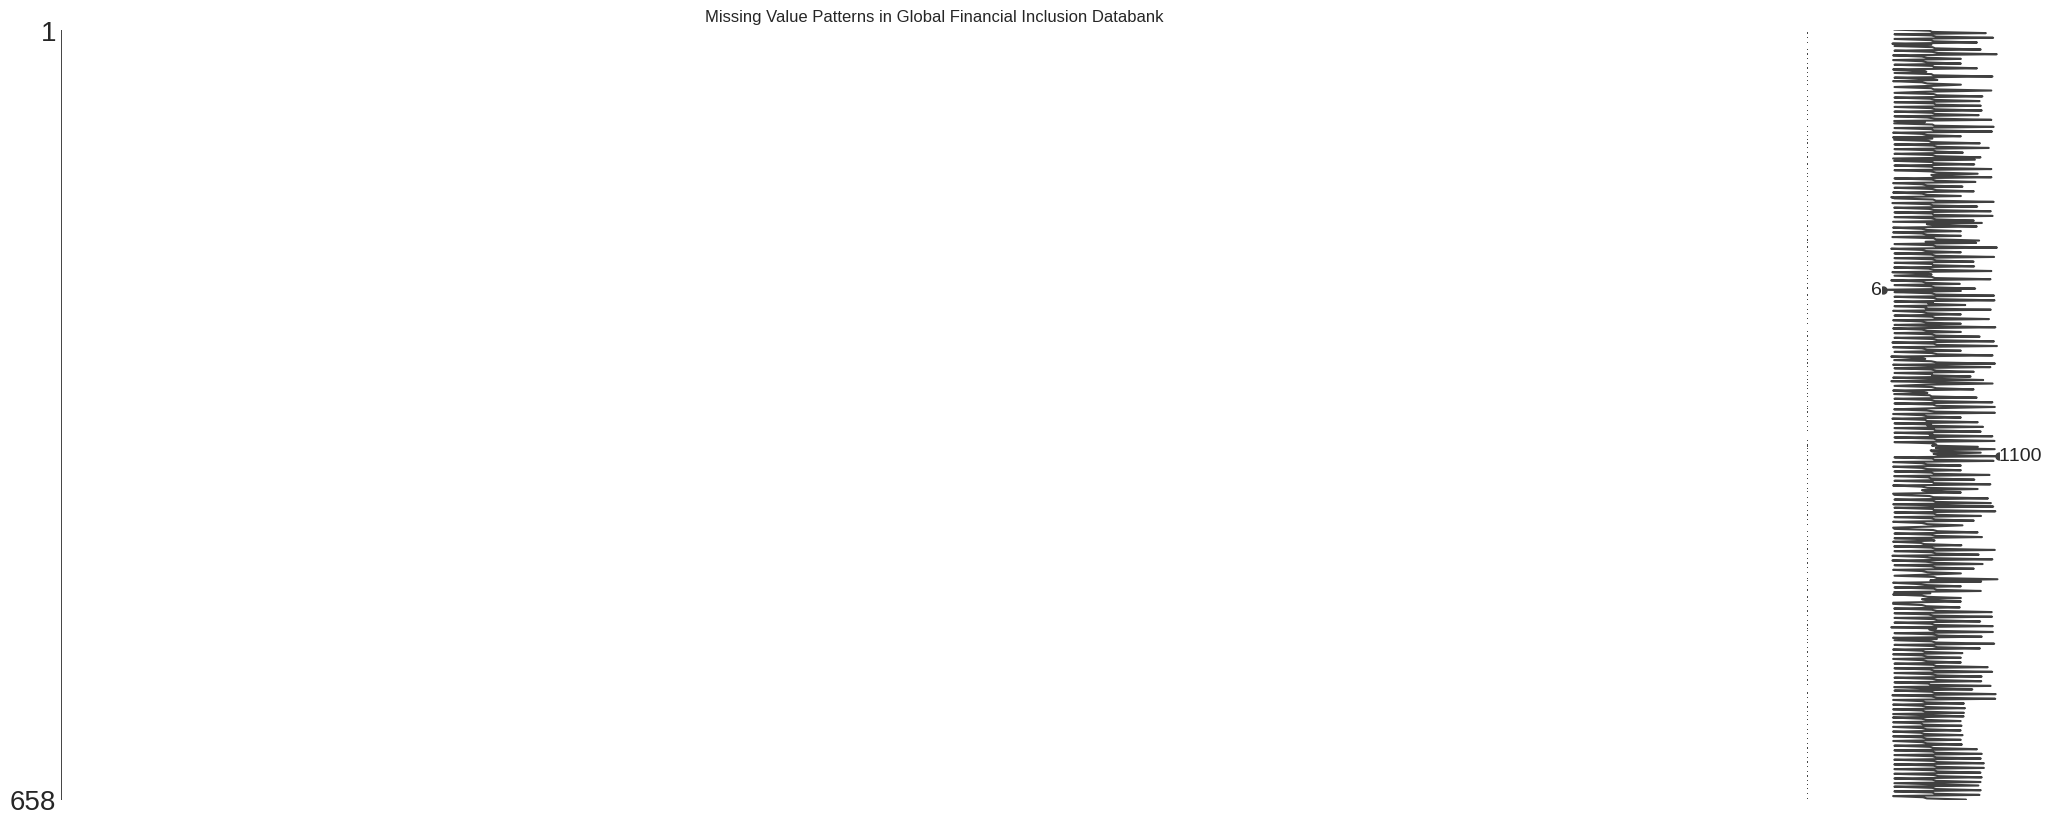


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Columns: 1232 entries, Country name to Used a mobile phone or the internet to access an account, in labor force (% age 15+)
dtypes: float64(1227), int64(1), object(4)
memory usage: 6.2+ MB

Numerical column statistics:


Year  Adult populaiton  Account (% age 15+)  \
count   658.000000      6.500000e+02           657.000000   
mean   2015.750760      2.041190e+08             0.578112   
std       3.727214      6.995500e+08             0.291877   
min    2011.000000      2.298587e+05             0.004049   
25%    2011.000000      4.239779e+06             0.336426   
50%    2017.000000      9.564992e+06             0.559644   
75%    2017.000000      5.181095e+07             0.860251   
max    2022.000000      5.776585e+09             1.000000   

       Financial institution account (% age 15+)  \
count                                 657.000000   
mean                                    0.554654   
std                                     0.305909   
min                                     0.004049   
25%                                     0.285712   
50%                                     0.527148   
75%                                     0.860251   
max                                     1.000000   

       First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)  \
count                                         116.000000                                                                        
mean                                            0.292402                                                                        
std                                             0.207752                                                                        
min                                             0.021286                                                                        
25%                                             0.107235                                                                        
50%                                             0.231276                                                                        
75%                                             0.431515                                                                        
max                                             0.830914                                                                        

       First financial institution account ever was opened to receive a wage payment (% age 15+)  \
count                                         116.000000                                           
mean                                            0.254874                                           
std                                             0.186674                                           
min                                             0.020349                                           
25%                                             0.095916                                           
50%                                             0.201289                                           
75%                                             0.365511                                           
max                                             0.720441                                           

       First financial institution ever account was opened to receive money from the government (% age 15+)  \
count                                         116.000000                                                      
mean                                            0.100456                                                      
std                                             0.075022                                                      
min                                             0.010051                                                      
25%                                             0.043730                                                      
50%                                             0.080067                                                      
75%                                             0.140821                                                      
max                                         


Categorical column information:

Value counts for Country name:


Country name
Afghanistan    4
Albania        4
Algeria        4
Argentina      4
Australia      4
Armenia        4
Austria        4
Azerbaijan     4
Bulgaria       4
Bangladesh     4
Name: count, dtype: int64


Value counts for Country code:


Country code
AFG    4
ALB    4
DZA    4
ARG    4
AUS    4
ARM    4
AUT    4
AZE    4
BGR    4
BGD    4
Name: count, dtype: int64


Value counts for Region:


Region
High income                                           178
Sub-Saharan Africa (excluding high income)            145
Europe & Central Asia (excluding high income)          84
Latin America & Caribbean (excluding high income)      74
Middle East & North Africa (excluding high income)     42
East Asia & Pacific (excluding high income)            42
South Asia                                             30
Name: count, dtype: int64


Value counts for Income group:


Income group
High income            182
Lower middle income    165
Upper middle income    159
Low income              78
Name: count, dtype: int64

In [ ]:
databank_df = load_and_examine_file(f"{DATA_PATH}DatabankWide (1).xlsx")
databank_df = analyze_dataframe(databank_df, "Global Financial Inclusion Databank")

Loading: Global_Mobile_Money_Dataset_2023 (1).xlsx
✓ Successfully loaded with shape: (85, 2)


DataFrame shape: (85, 2) (rows, columns)

Sample data:


Unnamed: 0    GLOBAL MOBILE MONEY DATASET
0         NaN                            NaN
1         NaN  Date: May 2024 | Version: 1.0
2         NaN                            NaN
3         NaN                            NaN
4         NaN                         ABOUT


Missing values:


Missing Values  Percent Missing
Unnamed: 0                               85       100.000000
GLOBAL MOBILE MONEY DATASET              21        24.705882

<Figure size 1000x600 with 0 Axes>

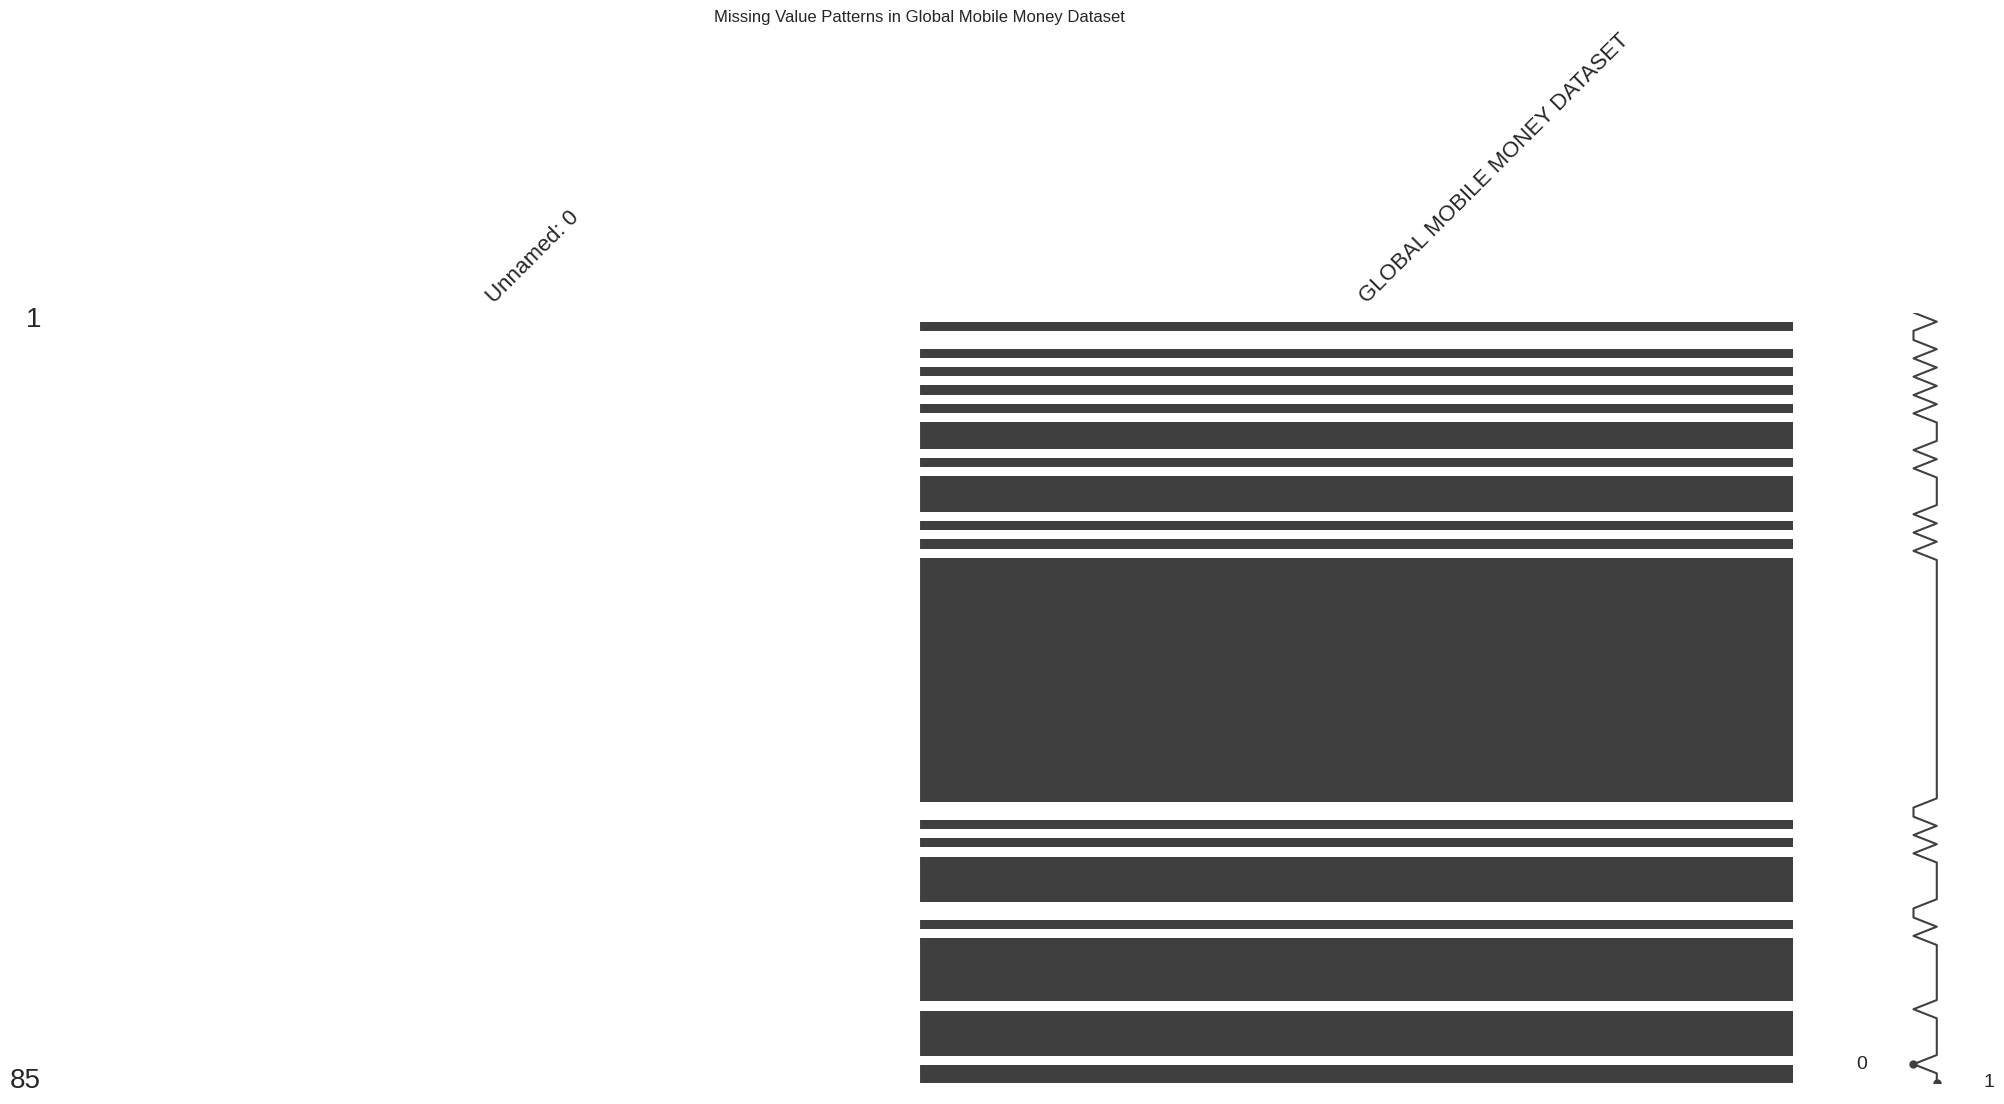


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   0 non-null      float64
 1   GLOBAL MOBILE MONEY DATASET  64 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.5+ KB

Numerical column statistics:


Unnamed: 0
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


Categorical column information:

Value counts for GLOBAL MOBILE MONEY DATASET:


GLOBAL MOBILE MONEY DATASET
Date: May 2024 | Version: 1.0                                                                                                                                                                                                                                                                                                                                 1
ABOUT                                                                                                                                                                                                                                                                                                                                                         1
The Global Mobile Money Dataset is a comprehensive set of global metrics for the industry which combines unique data sources that the GSMA Mobile Money programme has been collecting and analysing since its inception. For an interactive display of the data please visit GSMA's Mobile Money Metrics website from where this file has been downloaded.    1
DATA SOURCES                                                                                                                                                                                                                                                                                                                                                  1
The Global Mobile Money Dataset employs a wide range of data sources that the Mobile Money programme has been collecting and analysing since 2009, including:                                                                                                                                                                                                 1
The Mobile Money Deployment Tracker                                                                                                                                                                                                                                                                                                                           1
The Global Adoption Survey of Mobile Financial Services                                                                                                                                                                                                                                                                                                       1
The GSMA Mobile Money Estimates & Forecasts                                                                                                                                                                                                                                                                                                                   1
This workbook contains four datasets covering four main categories:                                                                                                                                                                                                                                                                                           1
Availability: The number of live mobile money services worldwide between 2001-2023, broken down by region.                                                                                                                                                                                                                                                    1
Name: count, dtype: int64

In [ ]:
mobile_money_df = load_and_examine_file(f"{DATA_PATH}Global_Mobile_Money_Dataset_2023 (1).xlsx")
mobile_money_df = analyze_dataframe(mobile_money_df, "Global Mobile Money Dataset")

Loading: FI-Indicators-Dec-2024.xlsx
✓ Successfully loaded with shape: (25, 28)


DataFrame shape: (25, 28) (rows, columns)

Sample data:


Unnamed: 0                     Financial Inclusion Indicators  Unnamed: 2  \
0         NaN                                      Category/Year      2013.0   
1         NaN                            Number of Access Points         NaN   
2         NaN                                     1.1 Branches/1       635.0   
3         NaN               1.2 Automated Teller Machines( ATMs)       887.0   
4         NaN  1.3 Agents of Commercial banks & Credit Instit...        32.0   

   Unnamed: 3  Unnamed: 4           Unnamed: 5           Unnamed: 6  \
0      2014.0      2015.0  2016-06-01 00:00:00  2016-12-01 00:00:00   
1         NaN         NaN                  NaN                  NaN   
2       664.0       691.0                  690                  701   
3       851.0       922.0                  941                  942   
4        25.0       128.0                  126                  121   

            Unnamed: 7           Unnamed: 8           Unnamed: 9  \
0  2017-06-01 00:00:00  2017-12-01 00:00:00  2018-06-01 00:00:00   
1                  NaN                  NaN                  NaN   
2                  673                  671                  675   
3                  944                  910                  942   
4                  133                  139                 1426   

           Unnamed: 10          Unnamed: 11          Unnamed: 12  \
0  2018-12-01 00:00:00  2019-06-01 00:00:00  2019-12-01 00:00:00   
1                  NaN                  NaN                  NaN   
2                  679                  712                  716   
3                  940                  956                  958   
4                 5524                 9370                11214   

           Unnamed: 13          Unnamed: 14          Unnamed: 15  \
0  2020-06-01 00:00:00  2020-12-01 00:00:00  2021-06-01 00:00:00   
1                  NaN                  NaN                  NaN   
2                  740                  715                  704   
3                  971                  966                  950   
4                13171                14248                16479   

           Unnamed: 16          Unnamed: 17          Unnamed: 18  \
0  2021-12-01 00:00:00  2022-06-01 00:00:00  2022-09-22 00:00:00   
1                  NaN                  NaN                  NaN   
2                  703                  702                  699   
3                  950                  951                  951   
4                22987                27039                29309   

           Unnamed: 19          Unnamed: 20          Unnamed: 21  \
0  2022-12-22 00:00:00  2023-03-22 00:00:00  2023-06-23 00:00:00   
1                  NaN                  NaN                  NaN   
2                  618                  701                  704   
3                  957                  972                  976   
4                32047                32803                31639   

           Unnamed: 22          Unnamed: 23          Unnamed: 24  \
0  2023-09-23 00:00:00  2023-12-23 00:00:00  2024-03-23 00:00:00   
1                  NaN                  NaN                  NaN   
2                  707                  702                  706   
3                  994                  957                  984   
4                32441                32190                32076   

           Unnamed: 25          Unnamed: 26          Unnamed: 27  
0  2024-06-24 00:00:00  2024-09-24 00:00:00  2024-12-24 00:00:00  
1                  NaN                  NaN                  NaN  
2                  714                  715                  719  
3                  989                  994                 1019  
4                32415                32857                33480


Missing values:


Missing Values  Percent Missing
Unnamed: 0               25            100.0
Unnamed: 2               16             64.0
Unnamed: 3               12             48.0
Unnamed: 4               12             48.0
Unnamed: 5               12             48.0
Unnamed: 6               12             48.0
Unnamed: 7               12             48.0
Unnamed: 8               12             48.0
Unnamed: 9               11             44.0
Unnamed: 10              11             44.0
Unnamed: 11              10             40.0
Unnamed: 12              10             40.0
Unnamed: 13              10             40.0
Unnamed: 14              10             40.0
Unnamed: 15              10             40.0
Unnamed: 16              10             40.0
Unnamed: 17              10             40.0
Unnamed: 18               7             28.0
Unnamed: 19               7             28.0
Unnamed: 20               7             28.0
Unnamed: 21               7             28.0
Unnamed: 22               7             28.0
Unnamed: 23               7             28.0
Unnamed: 24               7             28.0
Unnamed: 25               7             28.0
Unnamed: 26               7             28.0
Unnamed: 27               7             28.0

<Figure size 1000x600 with 0 Axes>

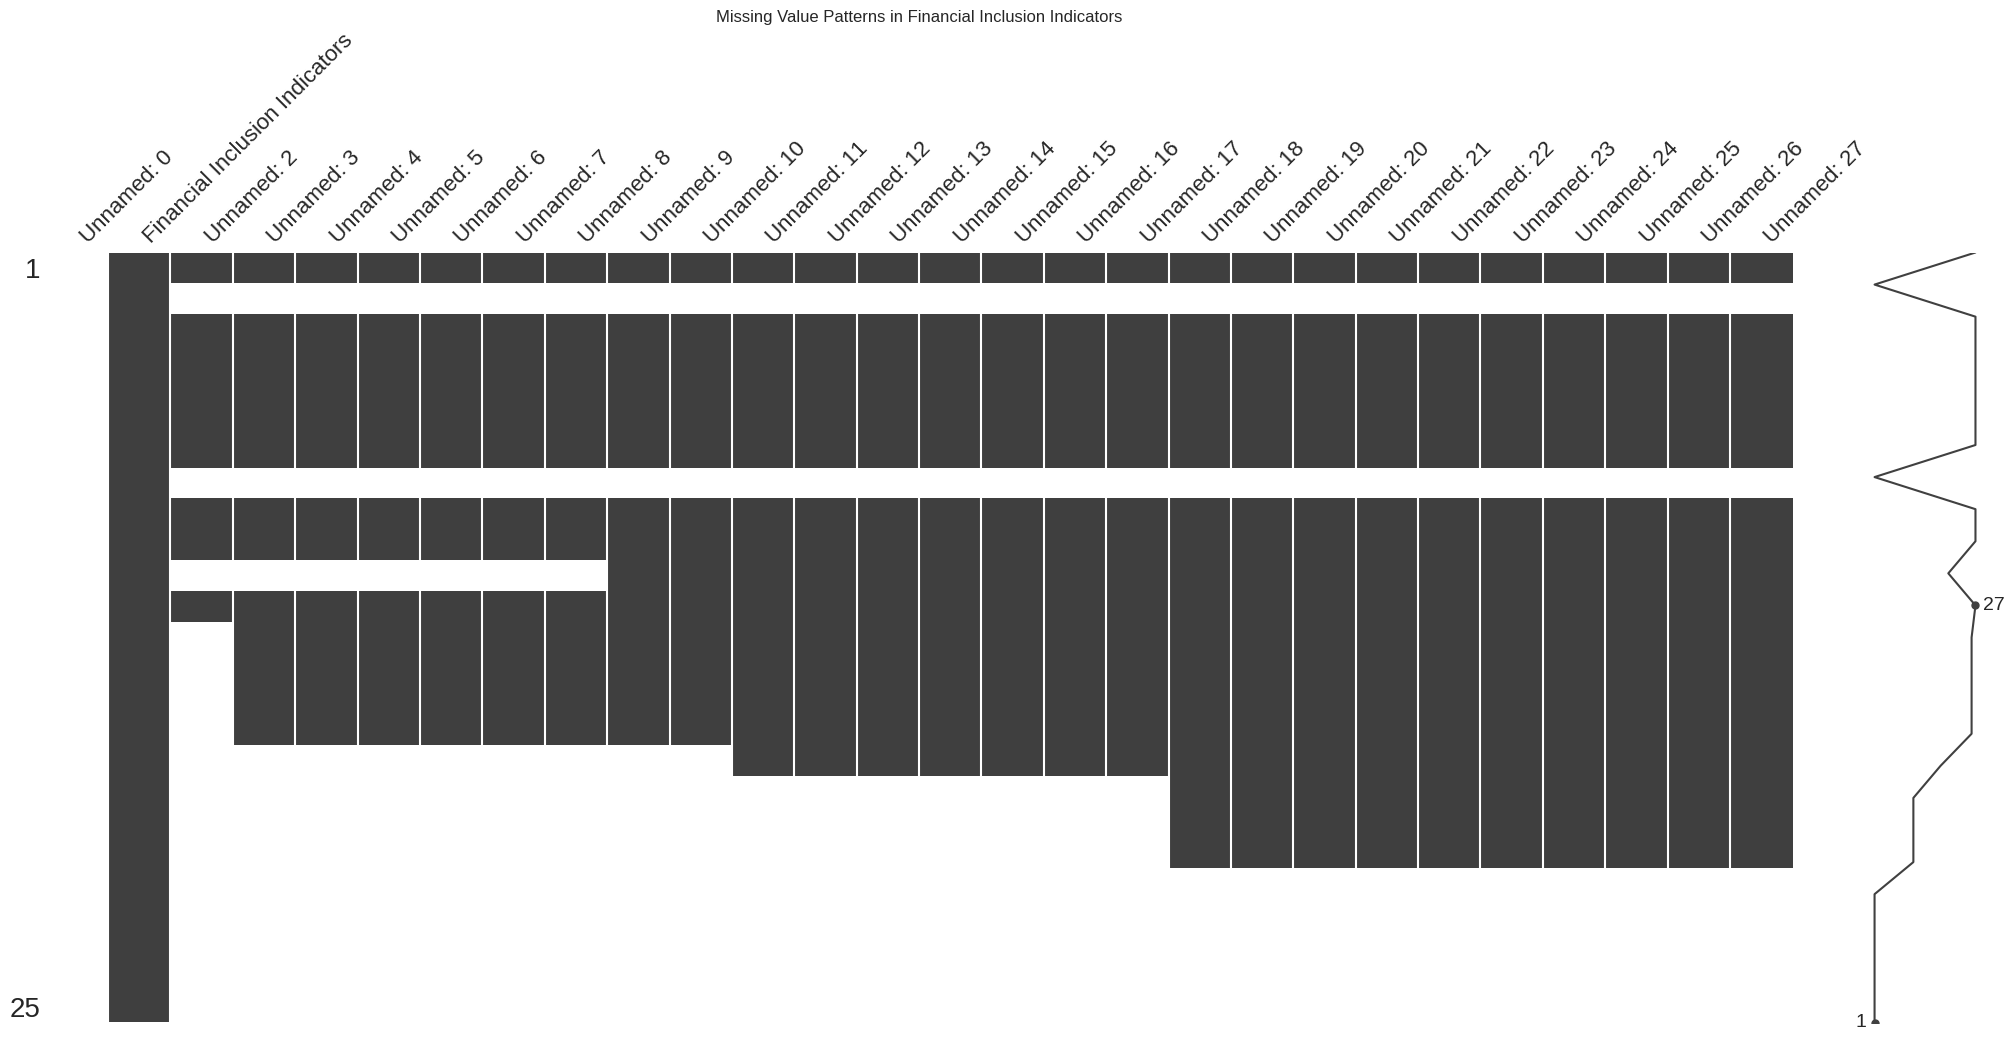


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      0 non-null      float64
 1   Financial Inclusion Indicators  25 non-null     object 
 2   Unnamed: 2                      9 non-null      float64
 3   Unnamed: 3                      13 non-null     float64
 4   Unnamed: 4                      13 non-null     float64
 5   Unnamed: 5                      13 non-null     object 
 6   Unnamed: 6                      13 non-null     object 
 7   Unnamed: 7                      13 non-null     object 
 8   Unnamed: 8                      13 non-null     object 
 9   Unnamed: 9                      14 non-null     object 
 10  Unnamed: 10                     14 non-null     object 
 11  Unnamed: 11                     15 non-null     object 
 12  Unnamed: 12             

Unnamed: 0    Unnamed: 2    Unnamed: 3    Unnamed: 4
count         0.0  9.000000e+00  1.300000e+01  1.300000e+01
mean          NaN  5.999731e+05  4.430666e+05  4.851740e+05
std           NaN  1.573024e+06  1.389352e+06  1.488308e+06
min           NaN  3.200000e+01  0.000000e+00  0.000000e+00
25%           NaN  8.870000e+02  2.927540e+01  6.303965e+01
50%           NaN  2.013000e+03  8.510000e+02  9.220000e+02
75%           NaN  5.511400e+04  7.900200e+04  1.094580e+05
max           NaN  4.771220e+06  5.039287e+06  5.399266e+06


Categorical column information:

Value counts for Financial Inclusion Indicators:


Financial Inclusion Indicators
Category/Year                                                                  1
Number of Access Points                                                        1
1.1 Branches/1                                                                 1
1.2 Automated Teller Machines( ATMs)                                           1
1.3 Agents of Commercial banks & Credit Institutions                           1
1.4 Mobile Money agents                                                        1
1.5 Total number of access points                                              1
Number of Accounts                                                             1
2.1 Number of adults with at least one type of regulated deposit account /2    1
2.2 Number of regulated credit account                                         1
Name: count, dtype: int64


Value counts for Unnamed: 5:


Unnamed: 5
2016-06-01 00:00:00    2
690                    1
941                    1
126                    1
119581                 1
121338                 1
5207071                1
799485                 1
67.76736               1
29.081529              1
Name: count, dtype: int64


Value counts for Unnamed: 6:


Unnamed: 6
2016-12-01 00:00:00    2
701                    1
942                    1
121                    1
132937                 1
134701                 1
6775625                1
874299                 1
74.131181              1
37.28889               1
Name: count, dtype: int64


Value counts for Unnamed: 7:


Unnamed: 7
2017-06-01 00:00:00    2
673                    1
944                    1
133                    1
147146                 1
148896                 1
7375006                1
918274                 1
80.714551              1
39.978932              1
Name: count, dtype: int64


Value counts for Unnamed: 8:


Unnamed: 8
2017-12-01 00:00:00    2
671                    1
910                    1
139                    1
160351                 1
162071                 1
9434614                1
862272                 1
86.558652              1
50.388254              1
Name: count, dtype: int64

In [ ]:
fi_indicators_df = load_and_examine_file(f"{DATA_PATH}BoU/FI-Indicators-Dec-2024.xlsx")
fi_indicators_df = analyze_dataframe(fi_indicators_df, "Financial Inclusion Indicators")

In [ ]:
# Agent and end-user datasets for mobile money
agent_demographics_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/agent_demographics.csv")
agent_demographics_df = analyze_dataframe(agent_demographics_df, "Agent Demographics")

Loading: agent_demographics.csv
✓ Successfully loaded with shape: (8, 3)


DataFrame shape: (8, 3) (rows, columns)

Sample data:


demographic_category      segment  percentage
0               Gender         Male          39
1               Gender       Female          61
2                  Age  18-24 years          43
3                  Age  25-34 years          48
4                  Age  35-44 years           8


Missing values:


Empty DataFrame
Columns: [Missing Values, Percent Missing]
Index: []


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   demographic_category  8 non-null      object
 1   segment               8 non-null      object
 2   percentage            8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes

Numerical column statistics:


percentage
count    8.000000
mean    37.500000
std     22.513488
min      1.000000
25%     29.750000
50%     41.000000
75%     51.250000
max     63.000000


Categorical column information:

Value counts for demographic_category:


demographic_category
Age         4
Gender      2
Location    2
Name: count, dtype: int64


Value counts for segment:


segment
Male           1
Female         1
18-24 years    1
25-34 years    1
35-44 years    1
45-54 years    1
Urban          1
Rural          1
Name: count, dtype: int64

In [ ]:
end_user_demographics_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/end_user_demographics.csv")
end_user_demographics_df = analyze_dataframe(end_user_demographics_df, "End User Demographics")

Loading: end_user_demographics.csv
✓ Successfully loaded with shape: (8, 4)


DataFrame shape: (8, 4) (rows, columns)

Sample data:


characteristic  total_percentage  male_percentage  female_percentage
0           Gender               100               63                 37
1  Age 18-24 years                31               29                 32
2  Age 25-34 years                45               45                 46
3  Age 35-44 years                17               18                 15
4  Age 45-54 years                 5                6                  5


Missing values:


Empty DataFrame
Columns: [Missing Values, Percent Missing]
Index: []


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   characteristic     8 non-null      object
 1   total_percentage   8 non-null      int64 
 2   male_percentage    8 non-null      int64 
 3   female_percentage  8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 388.0+ bytes

Numerical column statistics:


total_percentage  male_percentage  female_percentage
count          8.000000         8.000000           8.000000
mean          37.500000        33.000000          29.500000
std           36.316073        28.794841          25.967012
min            2.000000         3.000000           1.000000
25%           14.000000        13.500000          12.500000
50%           24.000000        23.500000          25.500000
75%           54.500000        49.500000          39.250000
max          100.000000        84.000000          81.000000


Categorical column information:

Value counts for characteristic:


characteristic
Gender                      1
Age 18-24 years             1
Age 25-34 years             1
Age 35-44 years             1
Age 45-54 years             1
Age 55 years and above      1
Able to read and write      1
Unable to read and write    1
Name: count, dtype: int64

Loading: Mobile-Money-Stats-W.xlsx
✓ Successfully loaded with shape: (7, 17)


DataFrame shape: (7, 17) (rows, columns)

Sample data:


Summary     Unnamed: 1    Unnamed: 2    Unnamed: 3  \
0                         Year  2.009000e+03  2.010000e+03  2.011000e+03   
1          No. of transactions  2.836186e+06  2.881574e+07  8.748093e+07   
2  Value of transactions (UGX)  1.325752e+11  9.627295e+11  3.752955e+12   
3  No. of registered customers  5.520470e+05  1.683713e+06  2.879968e+06   
4       Source: Bank of Uganda           NaN           NaN           NaN   

     Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7    Unnamed: 8  \
0  2.012000e+03  2.013000e+03  2.014000e+03  2.015000e+03  2.016000e+03   
1  2.417280e+08  3.994608e+08  4.962686e+08  6.935740e+08  9.747468e+08   
2  1.166278e+13  1.864566e+13  2.405390e+13  3.273895e+13  4.383053e+13   
3  8.870873e+06  1.424338e+07  1.880042e+07  2.110285e+07  2.158548e+07   
4           NaN           NaN           NaN           NaN           NaN   

     Unnamed: 9   Unnamed: 10   Unnamed: 11   Unnamed: 12   Unnamed: 13  \
0  2.017000e+03  2.018000e+03  2.019000e+03  2.020000e+03  2.021000e+03   
1  1.206845e+09  1.878736e+09  2.840934e+09  3.526972e+09  4.290780e+09   
2  6.309299e+13  7.110006e+13  7.309185e+13  9.372861e+13  1.389208e+14   
3  2.336253e+07  2.446598e+07  2.711370e+07  3.073517e+07  3.276237e+07   
4           NaN           NaN           NaN           NaN           NaN   

    Unnamed: 14   Unnamed: 15            Unnamed: 16  
0  2.022000e+03  2.023000e+03                  2024*  
1  5.230548e+09  6.429314e+09             6310139164  
2  1.656148e+14  2.275105e+14  232786988340381.78125  
3  4.089156e+07  4.340949e+07               82096722  
4           NaN           NaN                    NaN


Missing values:


Missing Values  Percent Missing
Summary                   1        14.285714
Unnamed: 1                3        42.857143
Unnamed: 2                3        42.857143
Unnamed: 3                3        42.857143
Unnamed: 4                3        42.857143
Unnamed: 5                3        42.857143
Unnamed: 6                3        42.857143
Unnamed: 7                3        42.857143
Unnamed: 8                3        42.857143
Unnamed: 9                3        42.857143
Unnamed: 10               3        42.857143
Unnamed: 11               3        42.857143
Unnamed: 12               3        42.857143
Unnamed: 13               3        42.857143
Unnamed: 14               3        42.857143
Unnamed: 15               3        42.857143
Unnamed: 16               3        42.857143

<Figure size 1000x600 with 0 Axes>

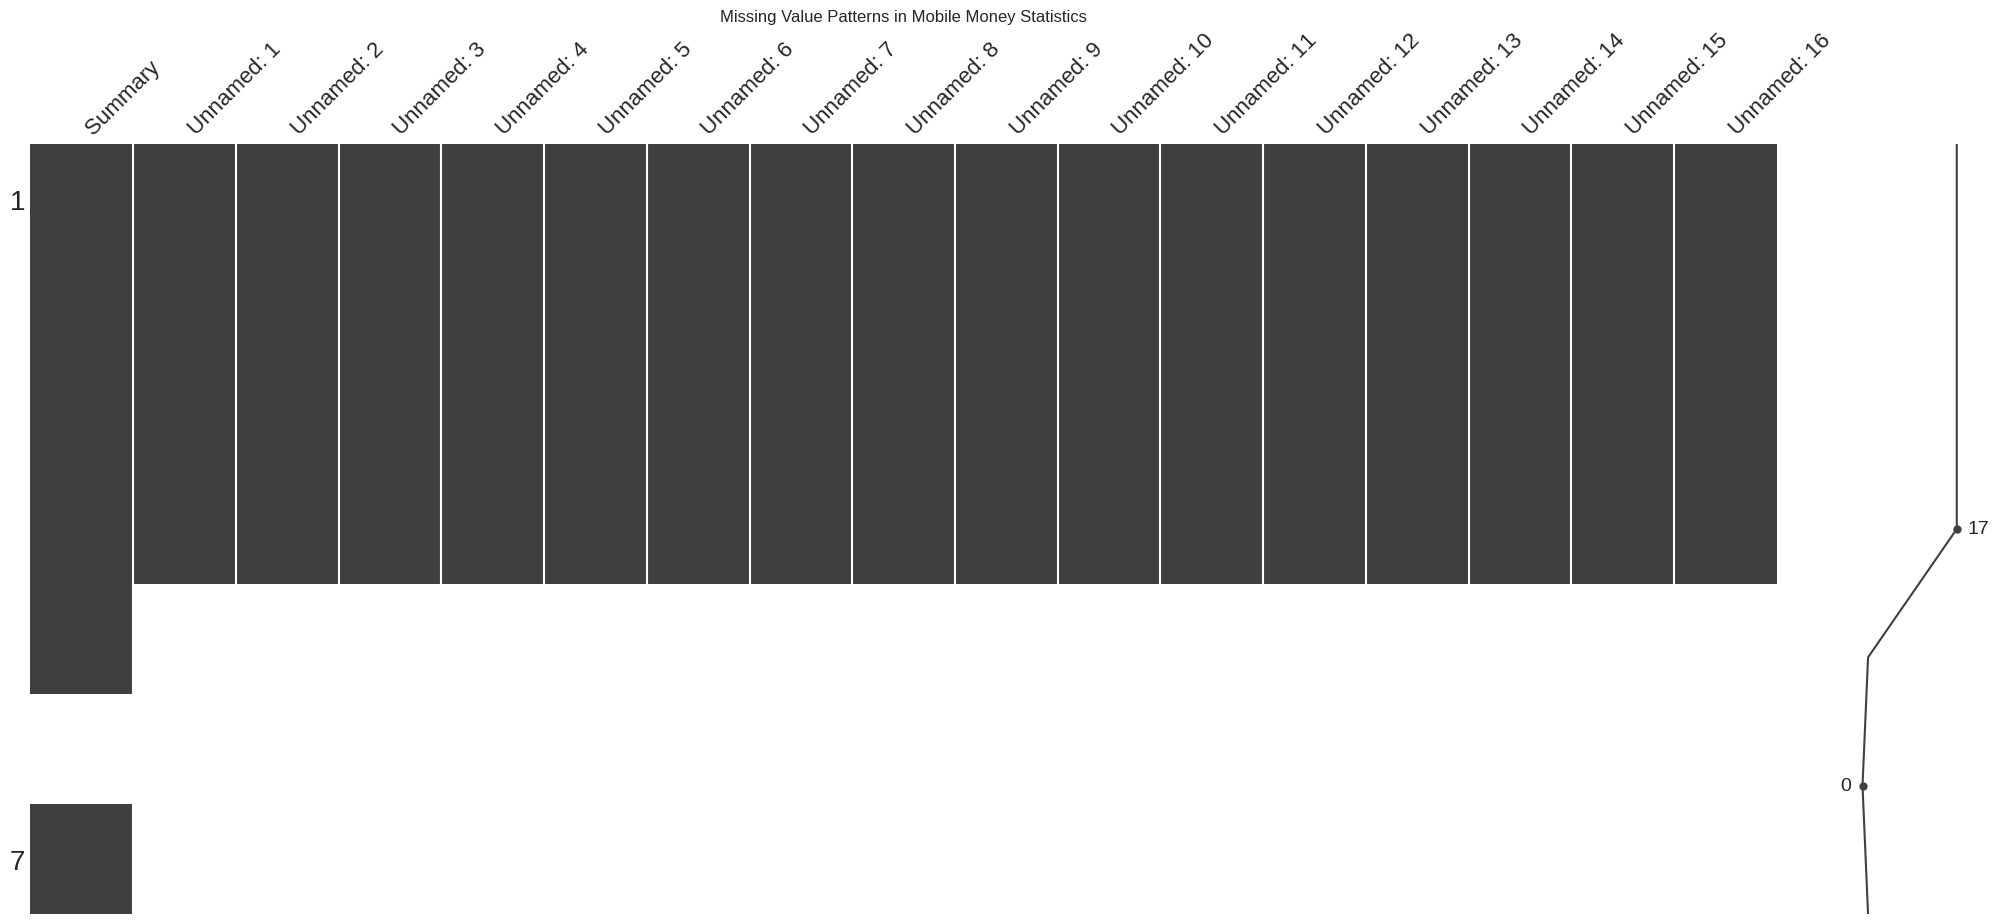


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Summary      6 non-null      object 
 1   Unnamed: 1   4 non-null      float64
 2   Unnamed: 2   4 non-null      float64
 3   Unnamed: 3   4 non-null      float64
 4   Unnamed: 4   4 non-null      float64
 5   Unnamed: 5   4 non-null      float64
 6   Unnamed: 6   4 non-null      float64
 7   Unnamed: 7   4 non-null      float64
 8   Unnamed: 8   4 non-null      float64
 9   Unnamed: 9   4 non-null      float64
 10  Unnamed: 10  4 non-null      float64
 11  Unnamed: 11  4 non-null      float64
 12  Unnamed: 12  4 non-null      float64
 13  Unnamed: 13  4 non-null      float64
 14  Unnamed: 14  4 non-null      float64
 15  Unnamed: 15  4 non-null      float64
 16  Unnamed: 16  4 non-null      object 
dtypes: float64(15), object(2)
memory usage: 1.1+ KB

Numerical column statistics:


Unnamed: 1    Unnamed: 2    Unnamed: 3    Unnamed: 4    Unnamed: 5  \
count  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
mean   3.314465e+10  2.406900e+11  9.382614e+11  2.915757e+12  4.661519e+12   
std    6.628704e+10  4.813597e+11  1.876462e+12  5.831346e+12  9.322761e+12   
min    2.009000e+03  2.010000e+03  2.011000e+03  2.012000e+03  2.013000e+03   
25%    4.145375e+05  1.263287e+06  2.160479e+06  6.653658e+06  1.068304e+07   
50%    1.694116e+06  1.524973e+07  4.518045e+07  1.252994e+08  2.068521e+08   
75%    3.314593e+10  2.407040e+11  9.383044e+11  2.915875e+12  4.661715e+12   
max    1.325752e+11  9.627295e+11  3.752955e+12  1.166278e+13  1.864566e+13   

         Unnamed: 6    Unnamed: 7    Unnamed: 8    Unnamed: 9   Unnamed: 10  \
count  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
mean   6.013604e+12  8.184915e+12  1.095788e+13  1.577356e+13  1.777549e+13   
std    1.202687e+13  1.636935e+13  2.191510e+13  3.154629e+13  3.554971e+13   
min    2.014000e+03  2.015000e+03  2.016000e+03  2.017000e+03  2.018000e+03   
25%    1.410082e+07  1.582764e+07  1.618962e+07  1.752240e+07  1.834999e+07   
50%    2.575345e+08  3.573384e+08  4.981661e+08  6.151038e+08  9.516008e+08   
75%    6.013848e+12  8.185257e+12  1.095836e+13  1.577415e+13  1.777642e+13   
max    2.405390e+13  3.273895e+13  4.383053e+13  6.309299e+13  7.110006e+13   

        Unnamed: 11   Unnamed: 12   Unnamed: 13   Unnamed: 14   Unnamed: 15  
count  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  
mean   1.827368e+13  2.343304e+13  3.473127e+13  4.140502e+13  5.687924e+13  
std    3.654545e+13  4.686371e+13  6.945965e+13  8.280652e+13  1.137542e+14  
min    2.019000e+03  2.020000e+03  2.021000e+03  2.022000e+03  2.023000e+03  
25%    2.033578e+07  2.305188e+07  2.457228e+07  3.066917e+07  3.255762e+07  
50%    1.434024e+09  1.778854e+09  2.161771e+09  2.635720e+09  3.236362e+09  
75%    1.827509e+13  2.343480e+13  3.473341e+13  4.140762e+13  5.688244e+13  
max    7.309185e+13  9.372861e+13  1.389208e+14  1.656148e+14  2.275105e+14


Categorical column information:

Value counts for Summary :


Summary 
Year                           1
No. of transactions            1
Value of transactions (UGX)    1
No. of registered customers    1
Source: Bank of Uganda         1
*Oct 2024                      1
Name: count, dtype: int64


Value counts for Unnamed: 16:


Unnamed: 16
2024*                    1
6310139164               1
232786988340381.78125    1
82096722                 1
Name: count, dtype: int64

In [ ]:
mobile_money_stats_df = load_and_examine_file(f"{DATA_PATH}BoU/Mobile-Money-Stats-W.xlsx")
mobile_money_stats_df = analyze_dataframe(mobile_money_stats_df, "Mobile Money Statistics")

In [ ]:
cross_network_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/cross_network_transactions.csv")
cross_network_df = analyze_dataframe(cross_network_df, "Cross Network Transactions")

Loading: cross_network_transactions.csv
✓ Successfully loaded with shape: (11, 5)


DataFrame shape: (11, 5) (rows, columns)

Sample data:


service_providers  sent_transactions_count  sent_transactions_percentage  \
0       MTN to Airtel                      193                          52.7   
1       Airtel to MTN                      152                          41.5   
2     MTN to Africell                        6                           1.6   
3       Airtel to UTL                        5                           1.4   
4  Airtel to Africell                        5                           1.4   

   received_transactions_count  received_transactions_percentage  
0                          220                              61.1  
1                          125                              34.7  
2                            2                               0.6  
3                            1                               0.3  
4                            0                               0.0


Missing values:


Empty DataFrame
Columns: [Missing Values, Percent Missing]
Index: []


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   service_providers                 11 non-null     object 
 1   sent_transactions_count           11 non-null     int64  
 2   sent_transactions_percentage      11 non-null     float64
 3   received_transactions_count       11 non-null     int64  
 4   received_transactions_percentage  11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 572.0+ bytes

Numerical column statistics:


sent_transactions_count  sent_transactions_percentage  \
count                11.000000                     11.000000   
mean                 33.272727                      9.090909   
std                  69.482503                     18.968999   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   4.000000                      1.100000   
75%                   5.500000                      1.500000   
max                 193.000000                     52.700000   

       received_transactions_count  received_transactions_percentage  
count                    11.000000                         11.000000  
mean                     32.727273                          9.090909  
std                      72.303653                         20.076975  
min                       0.000000                          0.000000  
25%                       1.000000                          0.300000  
50%                       2.000000                          0.600000  
75%                       3.000000                          0.800000  
max                     220.000000                         61.100000


Categorical column information:

Value counts for service_providers:


service_providers
MTN to Airtel         1
Airtel to MTN         1
MTN to Africell       1
Airtel to UTL         1
Airtel to Africell    1
MTN to UTL            1
Africell to MTN       1
UTL to MTN            1
UTL to Airtel         1
UTL to Africell       1
Name: count, dtype: int64

In [ ]:
# Let's focus on Uganda if possible
uganda_data = None
try:
    if 'Country name' in databank_df.columns:
        uganda_data = databank_df[databank_df['Country name'] == 'Uganda'].copy()
        print(f"✓ Found Uganda data with {uganda_data.shape[0]} rows")

        # Display Uganda data over time
        if 'Year' in uganda_data.columns:
            print("\nUganda financial inclusion trends over time:")
            display(uganda_data.sort_values('Year'))
    else:
        print("No country name column found in databank dataset")
except Exception as e:
    print(f"Error filtering Uganda data: {str(e)}")

✓ Found Uganda data with 4 rows

Uganda financial inclusion trends over time:


Country name Country code  Year  Adult populaiton  \
521       Uganda          UGA  2011        16508344.0   
522       Uganda          UGA  2014        18379766.0   
523       Uganda          UGA  2017        20746646.0   
524       Uganda          UGA  2021        24692876.0   

                                         Region Income group  \
521  Sub-Saharan Africa (excluding high income)   Low income   
522  Sub-Saharan Africa (excluding high income)   Low income   
523  Sub-Saharan Africa (excluding high income)   Low income   
524  Sub-Saharan Africa (excluding high income)   Low income   

     Account (% age 15+)  Financial institution account (% age 15+)  \
521             0.204614                                   0.204614   
522             0.444472                                   0.277834   
523             0.591991                                   0.328441   
524             0.659140                                   0.365608   

     First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)  \
521                                                NaN                                                                        
522                                                NaN                                                                        
523                                                NaN                                                                        
524                                           0.149708                                                                        

     First financial institution account ever was opened to receive a wage payment (% age 15+)  \
521                                                NaN                                           
522                                                NaN                                           
523                                                NaN                                           
524                                           0.119014                                           

     First financial institution ever account was opened to receive money from the government (% age 15+)  \
521                                                NaN                                                      
522                                                NaN                                                      
523                                                NaN                                                      
524                                           0.077046                                                      

     Owns a credit card (% age 15+)  Used a credit card (% age 15+)  \
521                        0.016309                             NaN   
522                        0.016466                             NaN   
523                        0.023193                             NaN   
524                        0.035117                             NaN   

     Used a credit card: in-store (% age 15+)  \
521                                       NaN   
522                                       NaN   
523                                       NaN   
524                                       NaN   

     Used a credit card: in-store (% who used a credit card, age 15+)  \
521                                                NaN                  
522                                                NaN                  
523                                                NaN                  
524                                                NaN                  

     Paid off all credit card balances in full by their due date (% age 15+)  \
521                                                NaN                         
522                                                NaN                         
523                                                NaN                         
524                                                NaN                         


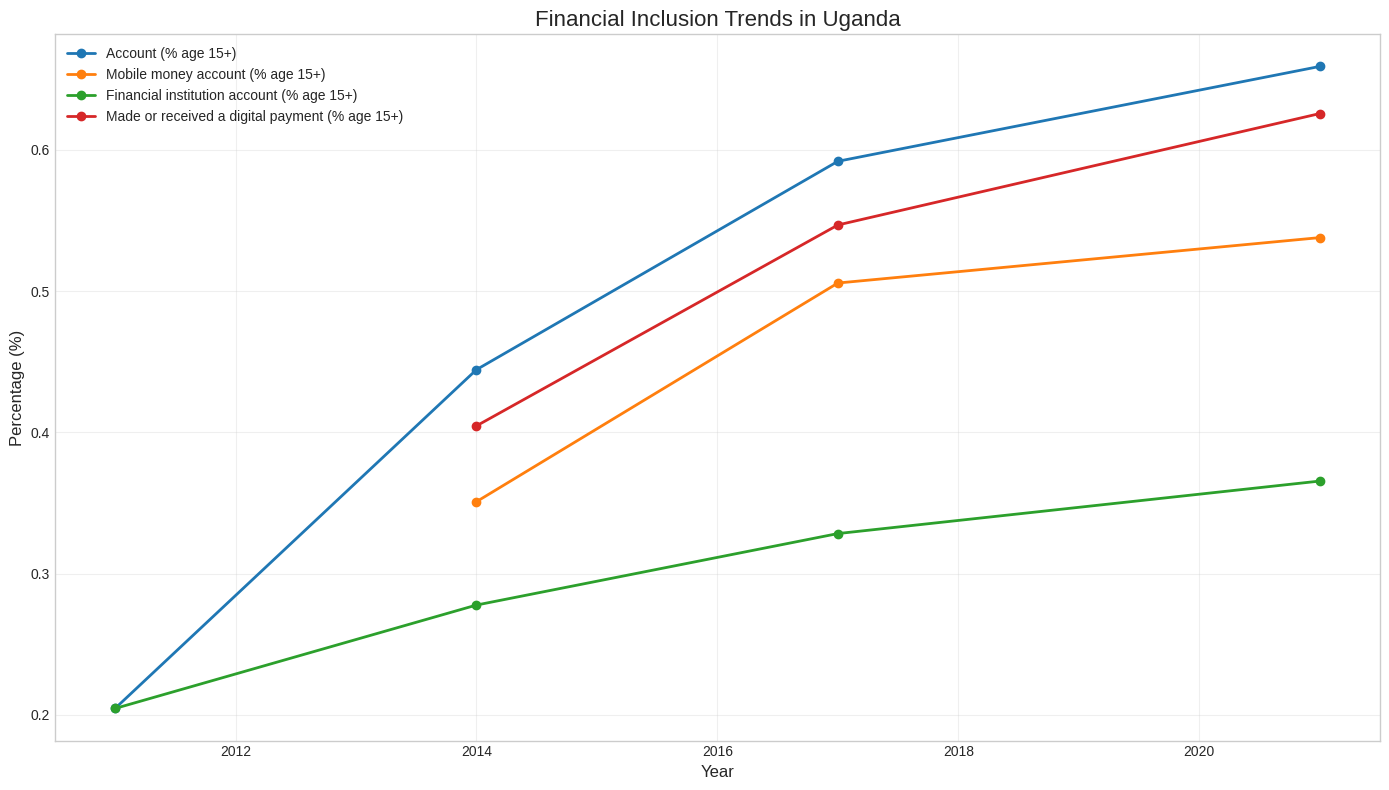

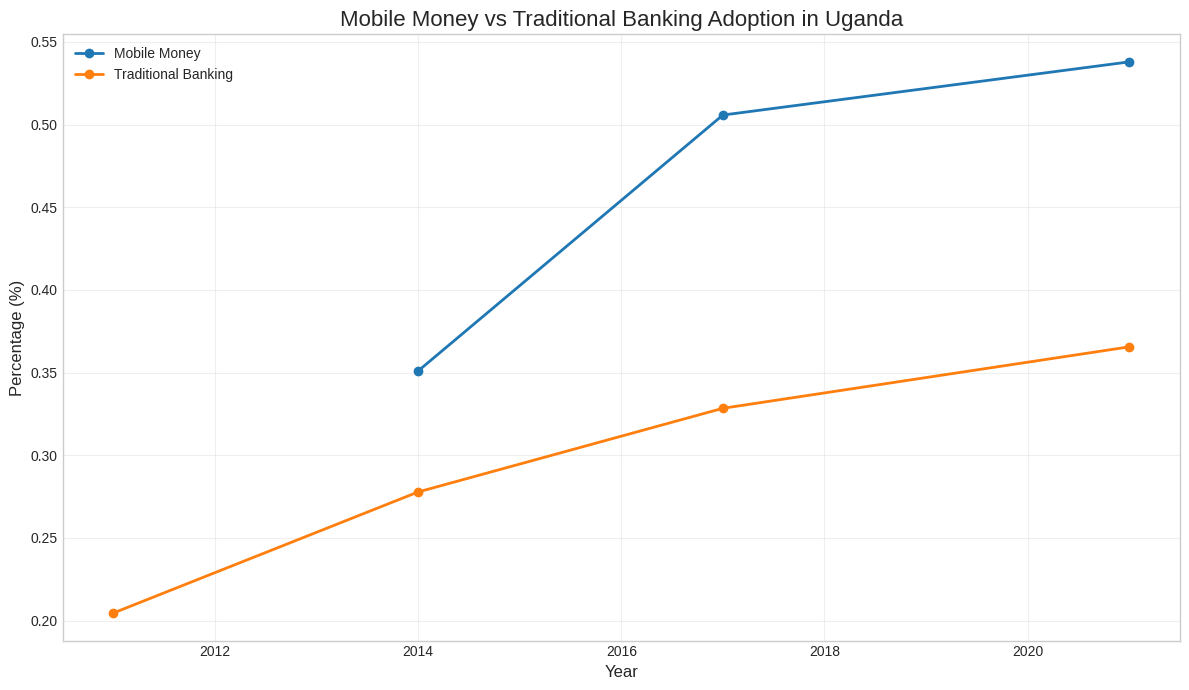

In [ ]:
if uganda_data is not None and len(uganda_data) > 0:
    try:
        # Set up time series plot for account ownership
        plt.figure(figsize=(14, 8))

        # Plot key metrics over time
        key_metrics = [
            'Account (% age 15+)',
            'Mobile money account (% age 15+)',
            'Financial institution account (% age 15+)',
            'Made or received a digital payment (% age 15+)'
        ]

        for metric in key_metrics:
            if metric in uganda_data.columns:
                plt.plot(uganda_data['Year'], uganda_data[metric], marker='o', linewidth=2, label=metric)

        plt.title('Financial Inclusion Trends in Uganda', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Compare mobile money vs traditional banking
        plt.figure(figsize=(12, 7))

        compare_metrics = [
            ('Mobile money account (% age 15+)', 'Mobile Money'),
            ('Financial institution account (% age 15+)', 'Traditional Banking')
        ]

        for metric, label in compare_metrics:
            if metric in uganda_data.columns:
                plt.plot(uganda_data['Year'], uganda_data[metric], marker='o', linewidth=2, label=label)

        plt.title('Mobile Money vs Traditional Banking Adoption in Uganda', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error creating time series plots: {str(e)}")

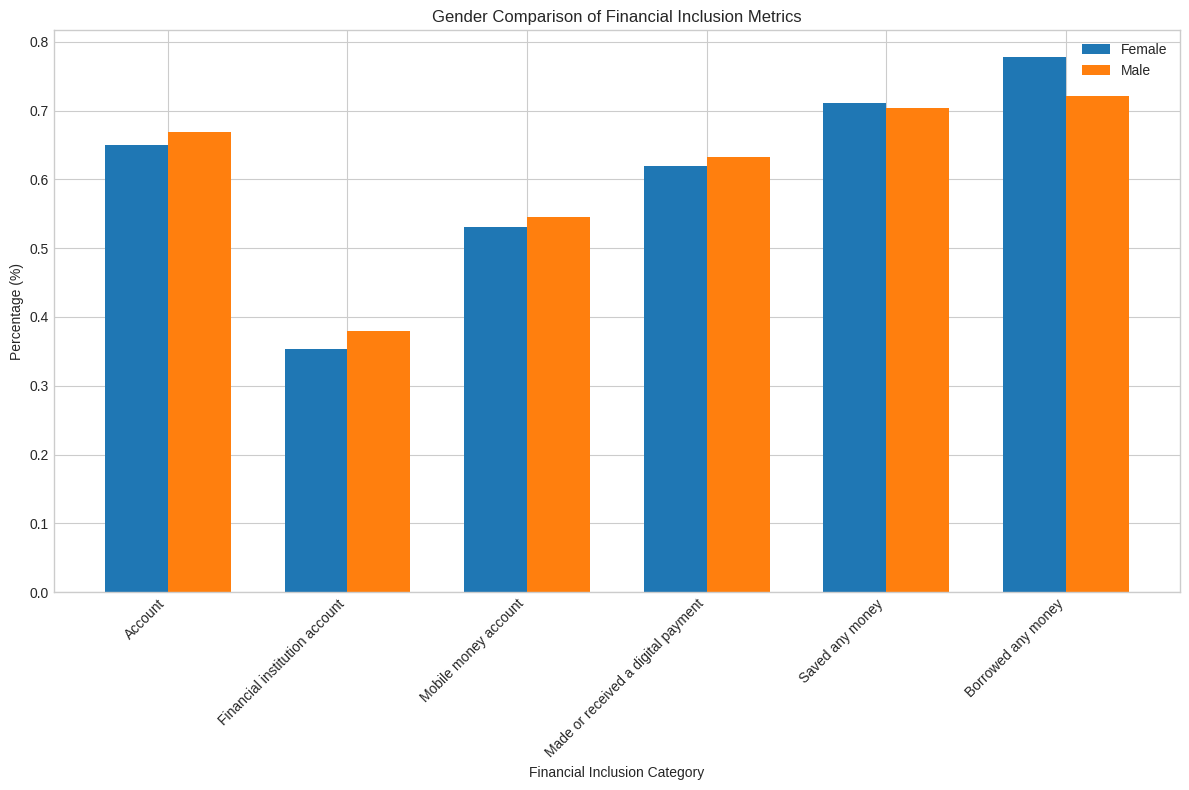

Gender gap analysis in financial inclusion:


Category  Female (%)  Male (%)  Gender Gap (M-F)
1       Financial institution account    0.353344  0.379559          0.026215
0                             Account    0.650629  0.668822          0.018193
2                Mobile money account    0.531544  0.545264          0.013720
3  Made or received a digital payment    0.619608  0.632793          0.013184
4                     Saved any money    0.711634  0.703628         -0.008006
5                  Borrowed any money    0.777969  0.720967         -0.057002

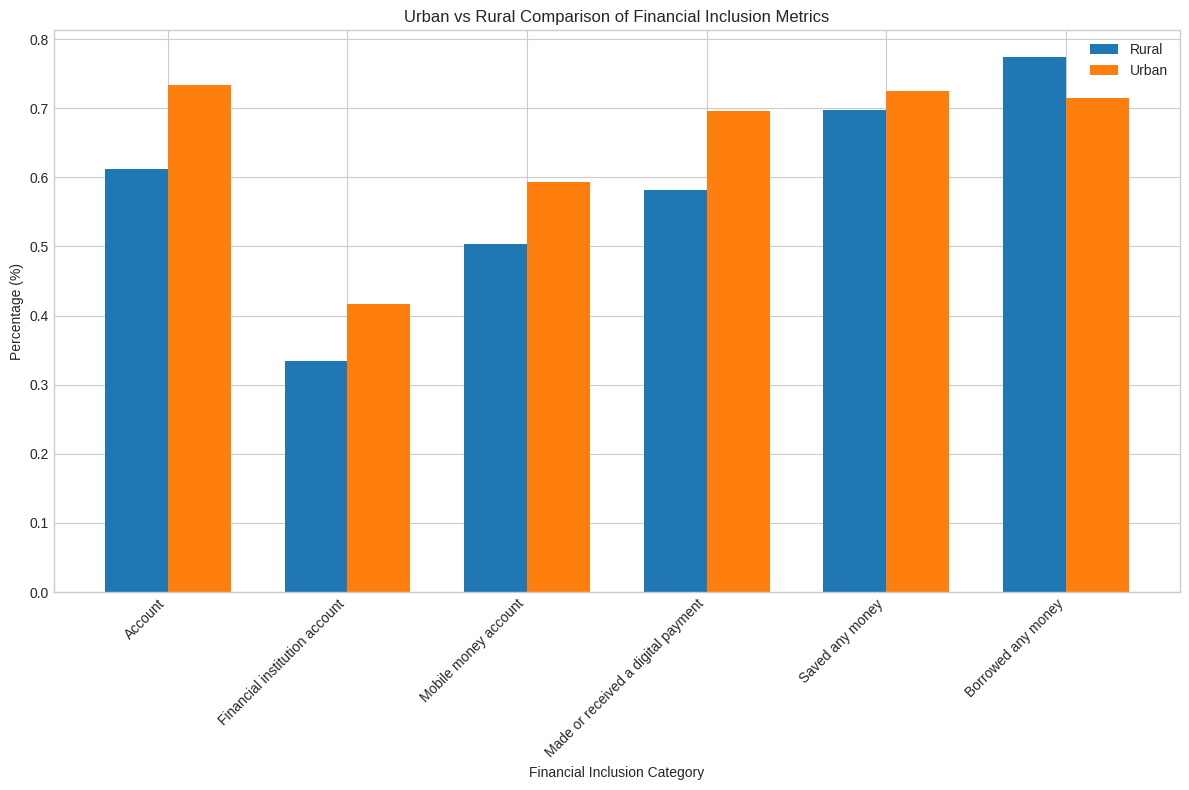

Urban-Rural gap analysis in financial inclusion:


Category  Rural (%)  Urban (%)  Urban-Rural Gap
0                             Account   0.612447   0.733412         0.120965
3  Made or received a digital payment   0.581861   0.695629         0.113768
2                Mobile money account   0.502901   0.593732         0.090831
1       Financial institution account   0.333785   0.416226         0.082441
4                     Saved any money   0.697151   0.724969         0.027819
5                  Borrowed any money   0.773993   0.715210        -0.058782

In [ ]:
try:
    if 'Account, female (% age 15+)' in databank_df.columns and 'Account, male (% age 15+)' in databank_df.columns:
        # Get the most recent year data for Uganda
        if uganda_data is not None and len(uganda_data) > 0:
            recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

            # Gender comparison
            gender_metrics = [
                ('Account', 'Account, female (% age 15+)', 'Account, male (% age 15+)'),
                ('Financial institution account', 'Financial institution account, female (% age 15+)', 'Financial institution account, male (% age 15+)'),
                ('Mobile money account', 'Mobile money account, female (% age 15+)', 'Mobile money account, male (% age 15+)'),
                ('Made or received a digital payment', 'Made or received a digital payment, female (% age 15+)', 'Made or received a digital payment, male (% age 15+)'),
                ('Saved any money', 'Saved any money, female (% age 15+)', 'Saved any money, male (% age 15+)'),
                ('Borrowed any money', 'Borrowed any money, female (% age 15+)', 'Borrowed any money, male (% age 15+)')
            ]

            # Create data for plotting
            categories = []
            female_values = []
            male_values = []

            for category, female_col, male_col in gender_metrics:
                if female_col in recent_data and male_col in recent_data:
                    categories.append(category)
                    female_values.append(recent_data[female_col])
                    male_values.append(recent_data[male_col])

            # Plot the gender comparison
            if categories:
                plt.figure(figsize=(12, 8))

                x = np.arange(len(categories))
                width = 0.35

                plt.bar(x - width/2, female_values, width, label='Female')
                plt.bar(x + width/2, male_values, width, label='Male')

                plt.xlabel('Financial Inclusion Category')
                plt.ylabel('Percentage (%)')
                plt.title('Gender Comparison of Financial Inclusion Metrics')
                plt.xticks(x, categories, rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()

                # Calculate and display gender gaps
                gender_gap = pd.DataFrame({
                    'Category': categories,
                    'Female (%)': female_values,
                    'Male (%)': male_values,
                    'Gender Gap (M-F)': [m - f for m, f in zip(male_values, female_values)]
                })

                print("Gender gap analysis in financial inclusion:")
                display(gender_gap.sort_values('Gender Gap (M-F)', ascending=False))

    # Urban vs Rural comparison if data available
    if 'Account, rural (% age 15+)' in databank_df.columns and 'Account, urban (% age 15+)' in databank_df.columns:
        # Similar analysis for urban/rural
        if uganda_data is not None and len(uganda_data) > 0:
            recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

            location_metrics = [
                ('Account', 'Account, rural (% age 15+)', 'Account, urban (% age 15+)'),
                ('Financial institution account', 'Financial institution account, rural (% age 15+)', 'Financial institution account, urban (% age 15+)'),
                ('Mobile money account', 'Mobile money account, rural (% age 15+)', 'Mobile money account, urban (% age 15+)'),
                ('Made or received a digital payment', 'Made or received a digital payment, rural (% age 15+)', 'Made or received a digital payment, urban (% age 15+)'),
                ('Saved any money', 'Saved any money, rural (% age 15+)', 'Saved any money, urban (% age 15+)'),
                ('Borrowed any money', 'Borrowed any money, rural (% age 15+)', 'Borrowed any money, urban (% age 15+)')
            ]

            # Create data for plotting
            categories = []
            rural_values = []
            urban_values = []

            for category, rural_col, urban_col in location_metrics:
                if rural_col in recent_data and urban_col in recent_data:
                    categories.append(category)
                    rural_values.append(recent_data[rural_col])
                    urban_values.append(recent_data[urban_col])

            # Plot the urban/rural comparison
            if categories:
                plt.figure(figsize=(12, 8))

                x = np.arange(len(categories))
                width = 0.35

                plt.bar(x - width/2, rural_values, width, label='Rural')
                plt.bar(x + width/2, urban_values, width, label='Urban')

                plt.xlabel('Financial Inclusion Category')
                plt.ylabel('Percentage (%)')
                plt.title('Urban vs Rural Comparison of Financial Inclusion Metrics')
                plt.xticks(x, categories, rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()

                # Calculate and display urban-rural gaps
                location_gap = pd.DataFrame({
                    'Category': categories,
                    'Rural (%)': rural_values,
                    'Urban (%)': urban_values,
                    'Urban-Rural Gap': [u - r for u, r in zip(urban_values, rural_values)]
                })

                print("Urban-Rural gap analysis in financial inclusion:")
                display(location_gap.sort_values('Urban-Rural Gap', ascending=False))

except Exception as e:
    print(f"Error in demographic analysis: {str(e)}")

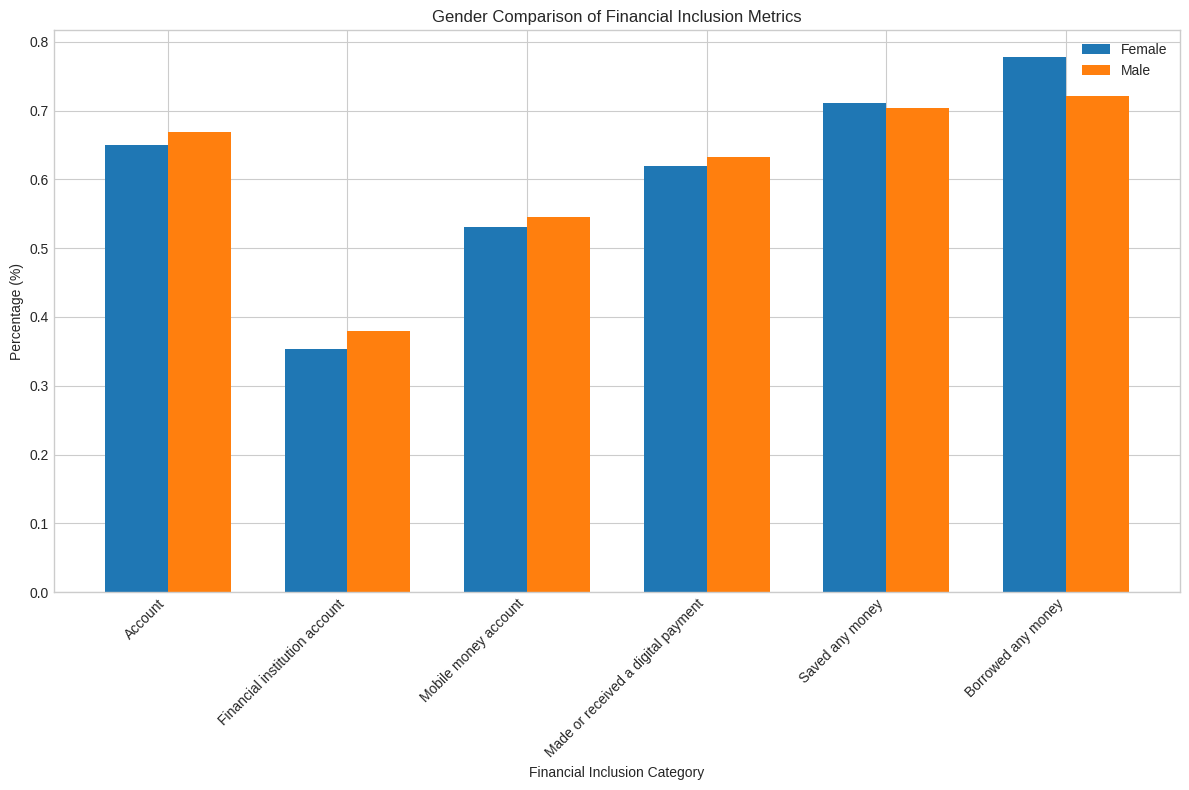

Gender gap analysis in financial inclusion:


Category  Female (%)  Male (%)  Gender Gap (M-F)
1       Financial institution account    0.353344  0.379559          0.026215
0                             Account    0.650629  0.668822          0.018193
2                Mobile money account    0.531544  0.545264          0.013720
3  Made or received a digital payment    0.619608  0.632793          0.013184
4                     Saved any money    0.711634  0.703628         -0.008006
5                  Borrowed any money    0.777969  0.720967         -0.057002

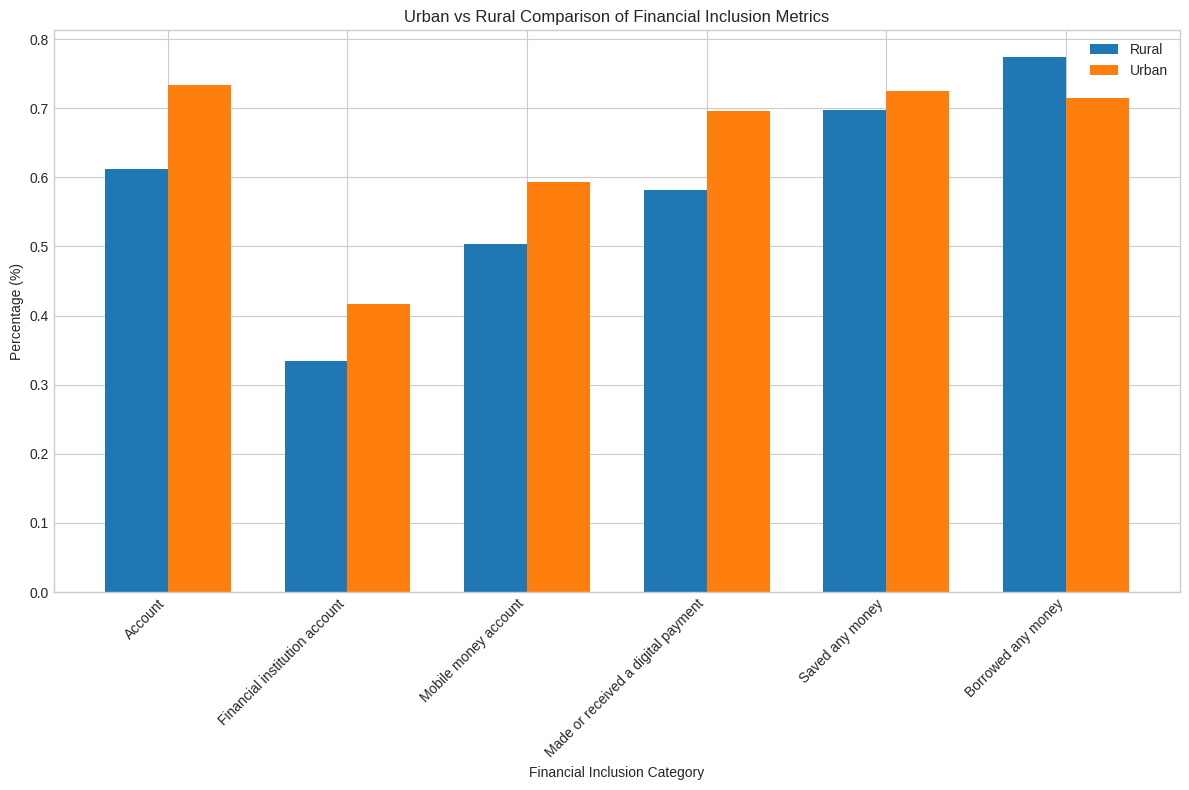

Urban-Rural gap analysis in financial inclusion:


Category  Rural (%)  Urban (%)  Urban-Rural Gap
0                             Account   0.612447   0.733412         0.120965
3  Made or received a digital payment   0.581861   0.695629         0.113768
2                Mobile money account   0.502901   0.593732         0.090831
1       Financial institution account   0.333785   0.416226         0.082441
4                     Saved any money   0.697151   0.724969         0.027819
5                  Borrowed any money   0.773993   0.715210        -0.058782

In [ ]:
try:
    if 'Account, female (% age 15+)' in databank_df.columns and 'Account, male (% age 15+)' in databank_df.columns:
        # Get the most recent year data for Uganda
        if uganda_data is not None and len(uganda_data) > 0:
            recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

            # Gender comparison
            gender_metrics = [
                ('Account', 'Account, female (% age 15+)', 'Account, male (% age 15+)'),
                ('Financial institution account', 'Financial institution account, female (% age 15+)', 'Financial institution account, male (% age 15+)'),
                ('Mobile money account', 'Mobile money account, female (% age 15+)', 'Mobile money account, male (% age 15+)'),
                ('Made or received a digital payment', 'Made or received a digital payment, female (% age 15+)', 'Made or received a digital payment, male (% age 15+)'),
                ('Saved any money', 'Saved any money, female (% age 15+)', 'Saved any money, male (% age 15+)'),
                ('Borrowed any money', 'Borrowed any money, female (% age 15+)', 'Borrowed any money, male (% age 15+)')
            ]

            # Create data for plotting
            categories = []
            female_values = []
            male_values = []

            for category, female_col, male_col in gender_metrics:
                if female_col in recent_data and male_col in recent_data:
                    categories.append(category)
                    female_values.append(recent_data[female_col])
                    male_values.append(recent_data[male_col])

            # Plot the gender comparison
            if categories:
                plt.figure(figsize=(12, 8))

                x = np.arange(len(categories))
                width = 0.35

                plt.bar(x - width/2, female_values, width, label='Female')
                plt.bar(x + width/2, male_values, width, label='Male')

                plt.xlabel('Financial Inclusion Category')
                plt.ylabel('Percentage (%)')
                plt.title('Gender Comparison of Financial Inclusion Metrics')
                plt.xticks(x, categories, rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()

                # Calculate and display gender gaps
                gender_gap = pd.DataFrame({
                    'Category': categories,
                    'Female (%)': female_values,
                    'Male (%)': male_values,
                    'Gender Gap (M-F)': [m - f for m, f in zip(male_values, female_values)]
                })

                print("Gender gap analysis in financial inclusion:")
                display(gender_gap.sort_values('Gender Gap (M-F)', ascending=False))

    # Urban vs Rural comparison if data available
    if 'Account, rural (% age 15+)' in databank_df.columns and 'Account, urban (% age 15+)' in databank_df.columns:
        # Similar analysis for urban/rural
        if uganda_data is not None and len(uganda_data) > 0:
            recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

            location_metrics = [
                ('Account', 'Account, rural (% age 15+)', 'Account, urban (% age 15+)'),
                ('Financial institution account', 'Financial institution account, rural (% age 15+)', 'Financial institution account, urban (% age 15+)'),
                ('Mobile money account', 'Mobile money account, rural (% age 15+)', 'Mobile money account, urban (% age 15+)'),
                ('Made or received a digital payment', 'Made or received a digital payment, rural (% age 15+)', 'Made or received a digital payment, urban (% age 15+)'),
                ('Saved any money', 'Saved any money, rural (% age 15+)', 'Saved any money, urban (% age 15+)'),
                ('Borrowed any money', 'Borrowed any money, rural (% age 15+)', 'Borrowed any money, urban (% age 15+)')
            ]

            # Create data for plotting
            categories = []
            rural_values = []
            urban_values = []

            for category, rural_col, urban_col in location_metrics:
                if rural_col in recent_data and urban_col in recent_data:
                    categories.append(category)
                    rural_values.append(recent_data[rural_col])
                    urban_values.append(recent_data[urban_col])

            # Plot the urban/rural comparison
            if categories:
                plt.figure(figsize=(12, 8))

                x = np.arange(len(categories))
                width = 0.35

                plt.bar(x - width/2, rural_values, width, label='Rural')
                plt.bar(x + width/2, urban_values, width, label='Urban')

                plt.xlabel('Financial Inclusion Category')
                plt.ylabel('Percentage (%)')
                plt.title('Urban vs Rural Comparison of Financial Inclusion Metrics')
                plt.xticks(x, categories, rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()

                # Calculate and display urban-rural gaps
                location_gap = pd.DataFrame({
                    'Category': categories,
                    'Rural (%)': rural_values,
                    'Urban (%)': urban_values,
                    'Urban-Rural Gap': [u - r for u, r in zip(urban_values, rural_values)]
                })

                print("Urban-Rural gap analysis in financial inclusion:")
                display(location_gap.sort_values('Urban-Rural Gap', ascending=False))

except Exception as e:
    print(f"Error in demographic analysis: {str(e)}")

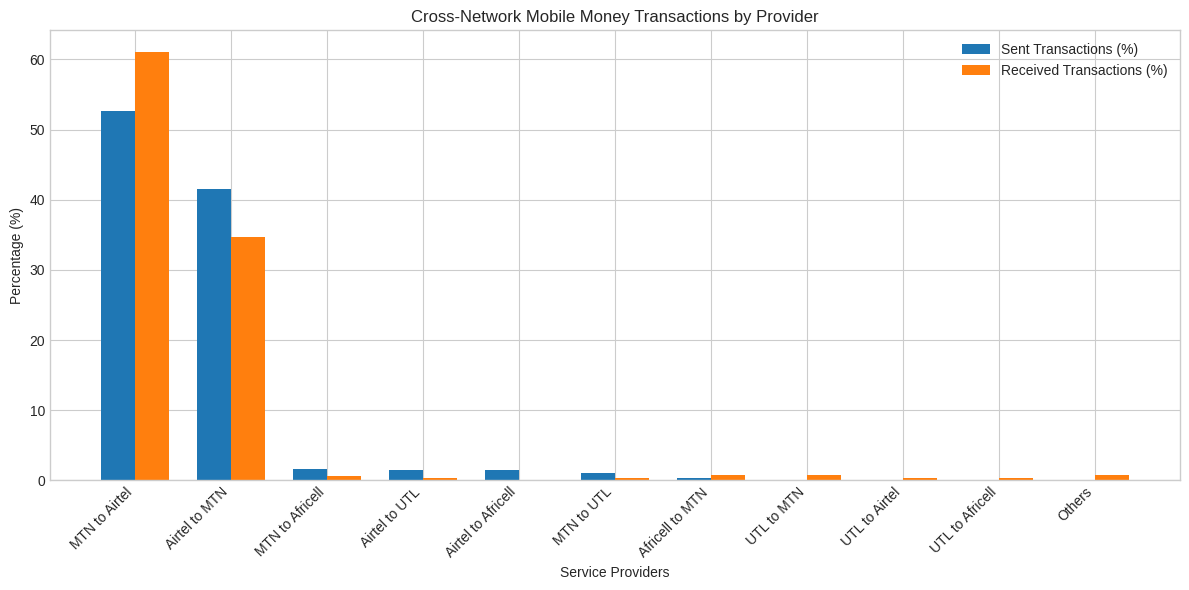

In [ ]:
if cross_network_df is not None:
    try:
        plt.figure(figsize=(12, 6))

        # Check if required columns exist
        if all(col in cross_network_df.columns for col in ['service_providers', 'sent_transactions_percentage', 'received_transactions_percentage']):
            # Create a bar chart for sent vs received transactions
            providers = cross_network_df['service_providers'].values
            sent_pct = cross_network_df['sent_transactions_percentage'].values
            received_pct = cross_network_df['received_transactions_percentage'].values

            x = np.arange(len(providers))
            width = 0.35

            plt.bar(x - width/2, sent_pct, width, label='Sent Transactions (%)')
            plt.bar(x + width/2, received_pct, width, label='Received Transactions (%)')

            plt.xlabel('Service Providers')
            plt.ylabel('Percentage (%)')
            plt.title('Cross-Network Mobile Money Transactions by Provider')
            plt.xticks(x, providers, rotation=45, ha='right')
            plt.legend()
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error analyzing cross-network transactions: {str(e)}")

Loading: agent_services.csv
✓ Successfully loaded with shape: (8, 2)


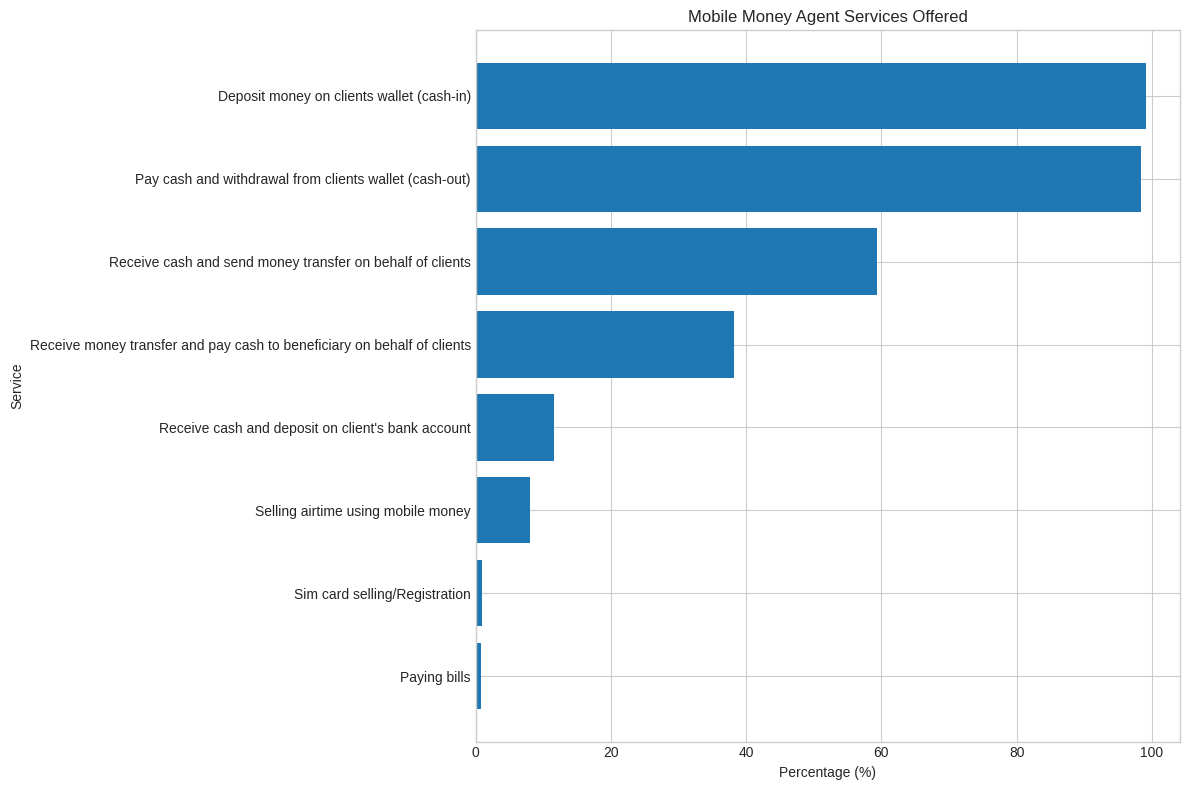

In [ ]:
agent_services_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/agent_services.csv")

if agent_services_df is not None:
    try:
        plt.figure(figsize=(12, 8))

        # Check if required columns exist
        if all(col in agent_services_df.columns for col in ['service', 'percentage']):
            # Sort the services by percentage
            agent_services_df = agent_services_df.sort_values('percentage', ascending=True)

            # Create a horizontal bar chart
            plt.barh(agent_services_df['service'], agent_services_df['percentage'])

            plt.xlabel('Percentage (%)')
            plt.ylabel('Service')
            plt.title('Mobile Money Agent Services Offered')
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error analyzing agent services: {str(e)}")

Loading: urban_rural_payment_willingness.csv
✓ Successfully loaded with shape: (3, 3)


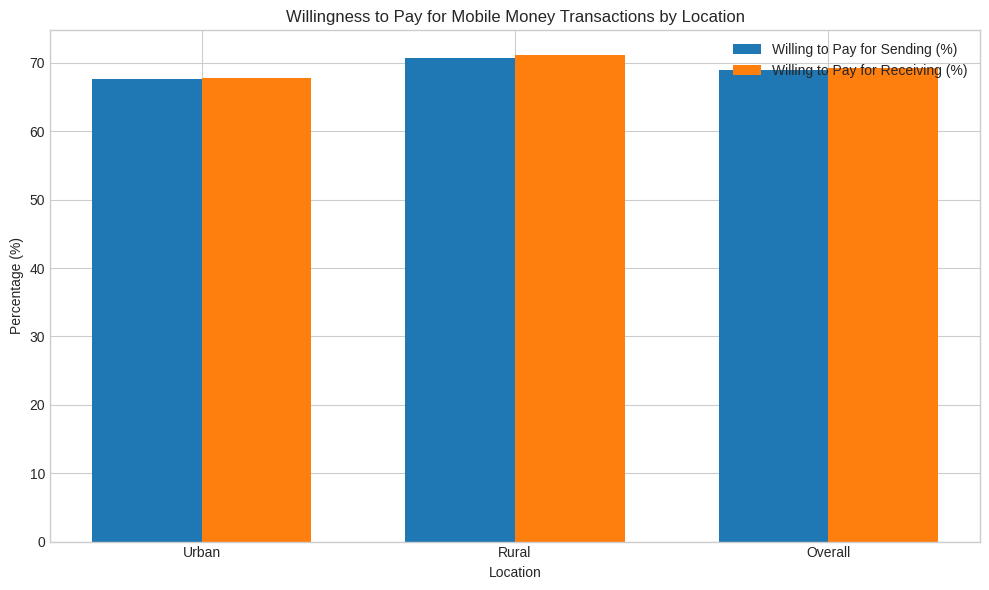

In [ ]:
urban_rural_payment_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/urban_rural_payment_willingness.csv")

if urban_rural_payment_df is not None:
    try:
        plt.figure(figsize=(10, 6))

        # Check if required columns exist
        if all(col in urban_rural_payment_df.columns for col in ['location', 'sending_percentage', 'receiving_percentage']):
            # Create a grouped bar chart
            locations = urban_rural_payment_df['location'].values
            sending_pct = urban_rural_payment_df['sending_percentage'].values
            receiving_pct = urban_rural_payment_df['receiving_percentage'].values

            x = np.arange(len(locations))
            width = 0.35

            plt.bar(x - width/2, sending_pct, width, label='Willing to Pay for Sending (%)')
            plt.bar(x + width/2, receiving_pct, width, label='Willing to Pay for Receiving (%)')

            plt.xlabel('Location')
            plt.ylabel('Percentage (%)')
            plt.title('Willingness to Pay for Mobile Money Transactions by Location')
            plt.xticks(x, locations)
            plt.legend()
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error analyzing urban/rural payment willingness: {str(e)}")

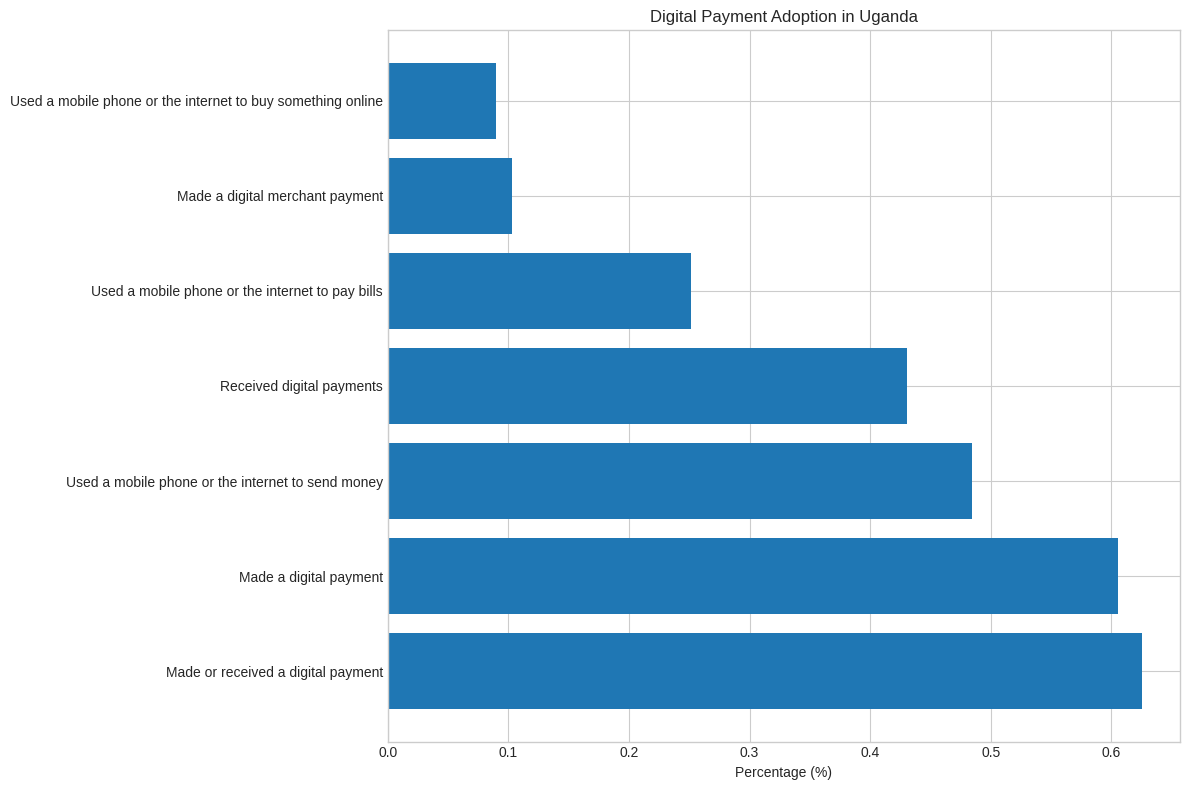

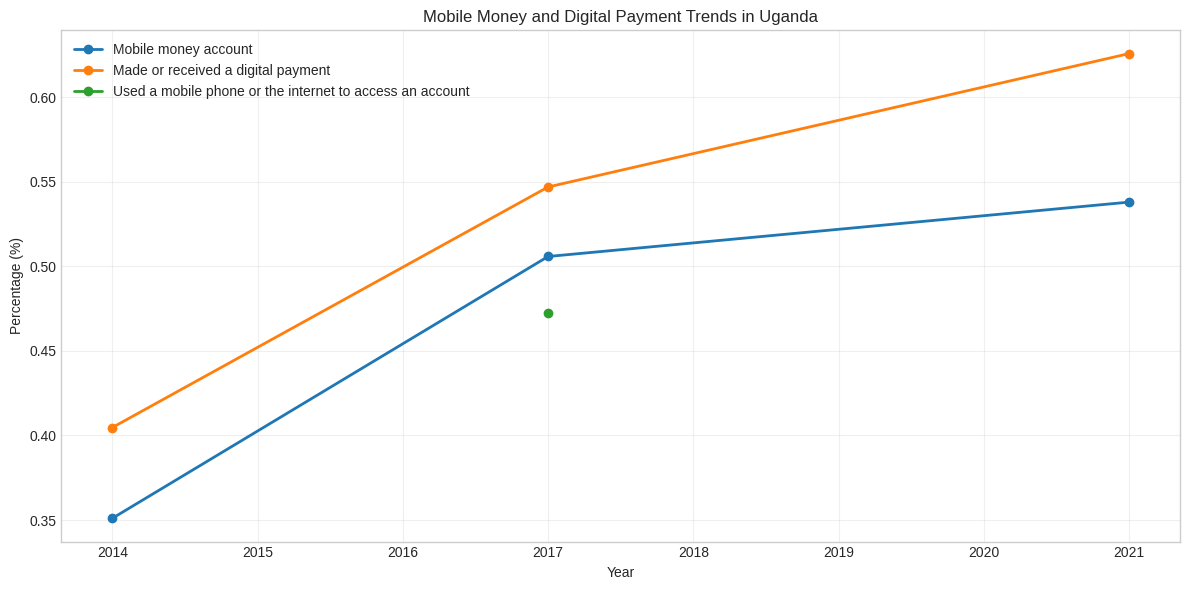

In [ ]:
try:
    if uganda_data is not None and len(uganda_data) > 0:
        recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

        # Analyze digital payment adoption
        digital_payment_cols = [
            'Made or received a digital payment (% age 15+)',
            'Made a digital payment (% age 15+)',
            'Received digital payments (% age 15+)',
            'Made a digital merchant payment (% age 15+)',
            'Used a mobile phone or the internet to send money (% age 15+)',
            'Used a mobile phone or the internet to pay bills (% age 15+)',
            'Used a mobile phone or the internet to buy something online (% age 15+)'
        ]

        # Filter to columns that exist
        existing_digital_cols = [col for col in digital_payment_cols if col in recent_data.index]

        if existing_digital_cols:
            # Create labels and values for plotting
            digital_labels = [col.split(' (% age')[0] for col in existing_digital_cols]
            digital_values = [recent_data[col] for col in existing_digital_cols]

            # Sort for better visualization
            sorted_digital = sorted(zip(digital_labels, digital_values), key=lambda x: x[1], reverse=True)
            digital_labels, digital_values = zip(*sorted_digital)

            plt.figure(figsize=(12, 8))
            plt.barh(digital_labels, digital_values)
            plt.xlabel('Percentage (%)')
            plt.title('Digital Payment Adoption in Uganda')
            plt.tight_layout()
            plt.show()

        # Time series of mobile money and digital payments if we have multiple years
        if len(uganda_data) > 1:
            # Key metrics to track over time
            mobile_digital_cols = [
                'Mobile money account (% age 15+)',
                'Made or received a digital payment (% age 15+)',
                'Used a mobile phone or the internet to access an account (% age 15+)'
            ]

            # Filter to columns that exist
            existing_mobile_digital_cols = [col for col in mobile_digital_cols if col in uganda_data.columns]

            if existing_mobile_digital_cols and 'Year' in uganda_data.columns:
                plt.figure(figsize=(12, 6))

                for col in existing_mobile_digital_cols:
                    plt.plot(uganda_data['Year'], uganda_data[col], marker='o', linewidth=2, label=col.split(' (% age')[0])

                plt.title('Mobile Money and Digital Payment Trends in Uganda')
                plt.xlabel('Year')
                plt.ylabel('Percentage (%)')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
except Exception as e:
    print(f"Error analyzing mobile money adoption and digital payments: {str(e)}")

Loading: transaction_methods.csv
✓ Successfully loaded with shape: (3, 2)


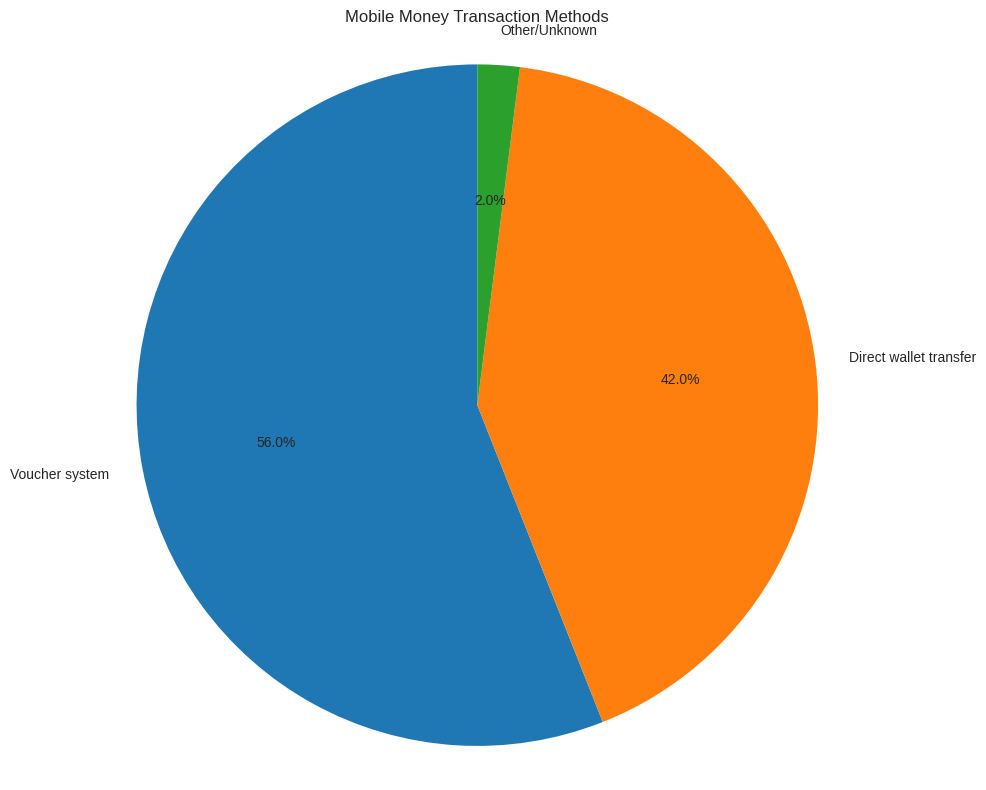

In [ ]:
transaction_methods_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/transaction_methods.csv")

if transaction_methods_df is not None:
    try:
        plt.figure(figsize=(10, 8))

        # Check if required columns exist
        if all(col in transaction_methods_df.columns for col in ['transaction_method', 'percentage']):
            # Sort the methods by percentage
            transaction_methods_df = transaction_methods_df.sort_values('percentage', ascending=False)

            # Create a pie chart
            plt.pie(transaction_methods_df['percentage'],
                   labels=transaction_methods_df['transaction_method'],
                   autopct='%1.1f%%',
                   startangle=90)
            plt.axis('equal')
            plt.title('Mobile Money Transaction Methods')
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error analyzing transaction methods: {str(e)}")

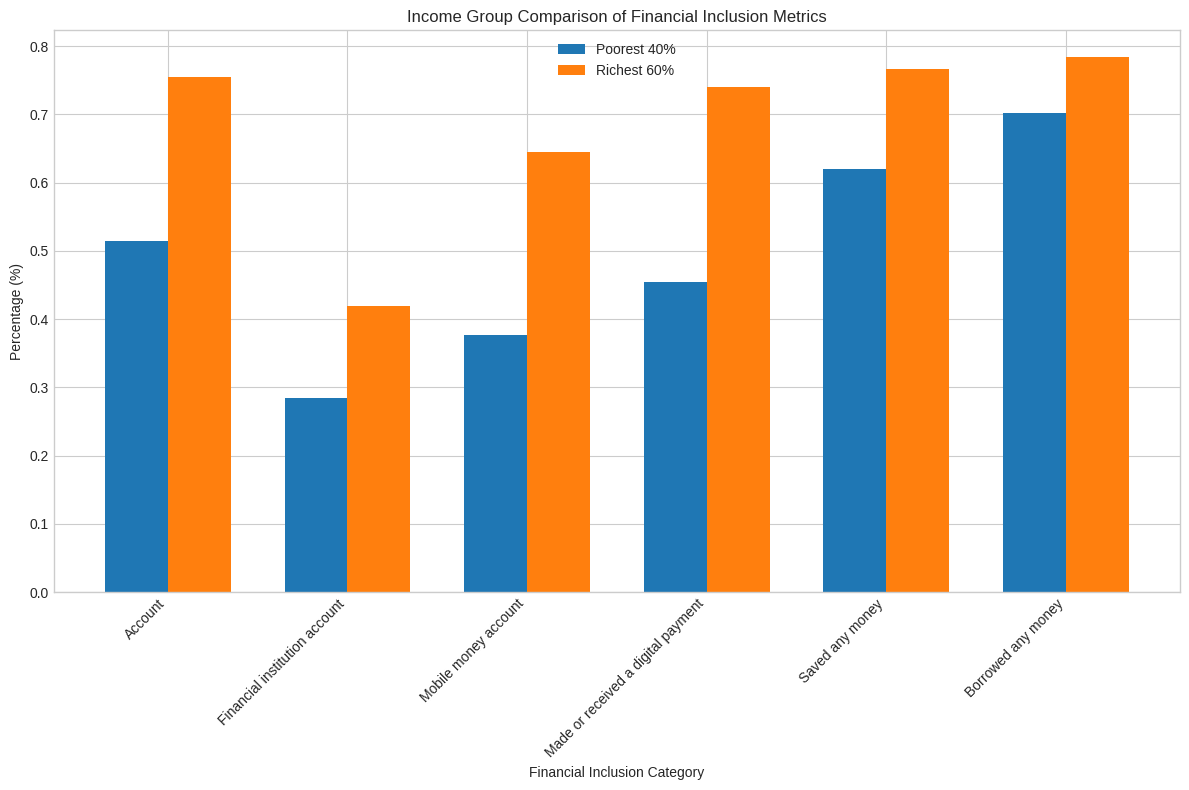

Income gap analysis in financial inclusion:


Category  Poorest 40% (%)  Richest 60% (%)  \
3  Made or received a digital payment         0.453770         0.740014   
2                Mobile money account         0.376594         0.645135   
0                             Account         0.513882         0.755614   
4                     Saved any money         0.620290         0.766068   
1       Financial institution account         0.284830         0.419257   
5                  Borrowed any money         0.701907         0.784108   

   Income Gap (R-P)  
3          0.286244  
2          0.268541  
0          0.241732  
4          0.145778  
1          0.134427  
5          0.082201

In [ ]:
try:
    if uganda_data is not None and len(uganda_data) > 0:
        recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

        # Analyze income group differences in financial inclusion
        income_metrics = [
            ('Account', 'Account, income, poorest 40% (% ages 15+)', 'Account, income, richest 60% (% ages 15+)'),
            ('Financial institution account', 'Financial institution account, income, poorest 40% (% ages 15+)', 'Financial institution account, income, richest 60% (% ages 15+)'),
            ('Mobile money account', 'Mobile money account, income, poorest 40% (% ages 15+)', 'Mobile money account, income, richest 60% (% ages 15+)'),
            ('Made or received a digital payment', 'Made or received a digital payment, income, poorest 40% (% ages 15+)', 'Made or received a digital payment, income, richest 60% (% ages 15+)'),
            ('Saved any money', 'Saved any money, income, poorest 40% (% ages 15+)', 'Saved any money, income, richest 60% (% ages 15+)'),
            ('Borrowed any money', 'Borrowed any money, income, poorest 40% (% ages 15+)', 'Borrowed any money, income, richest 60% (% ages 15+)')
        ]

        # Create data for plotting
        categories = []
        poorest_values = []
        richest_values = []

        for category, poorest_col, richest_col in income_metrics:
            if poorest_col in recent_data.index and richest_col in recent_data.index:
                categories.append(category)
                poorest_values.append(recent_data[poorest_col])
                richest_values.append(recent_data[richest_col])

        # Plot the income group comparison
        if categories:
            plt.figure(figsize=(12, 8))

            x = np.arange(len(categories))
            width = 0.35

            plt.bar(x - width/2, poorest_values, width, label='Poorest 40%')
            plt.bar(x + width/2, richest_values, width, label='Richest 60%')

            plt.xlabel('Financial Inclusion Category')
            plt.ylabel('Percentage (%)')
            plt.title('Income Group Comparison of Financial Inclusion Metrics')
            plt.xticks(x, categories, rotation=45, ha='right')
            plt.legend()
            plt.tight_layout()
            plt.show()

            # Calculate and display income group gaps
            income_gap = pd.DataFrame({
                'Category': categories,
                'Poorest 40% (%)': poorest_values,
                'Richest 60% (%)': richest_values,
                'Income Gap (R-P)': [r - p for r, p in zip(richest_values, poorest_values)]
            })

            print("Income gap analysis in financial inclusion:")
            display(income_gap.sort_values('Income Gap (R-P)', ascending=False))
except Exception as e:
    print(f"Error analyzing income groups and financial inclusion: {str(e)}")

Loading: end_user_income.csv
✓ Successfully loaded with shape: (10, 4)


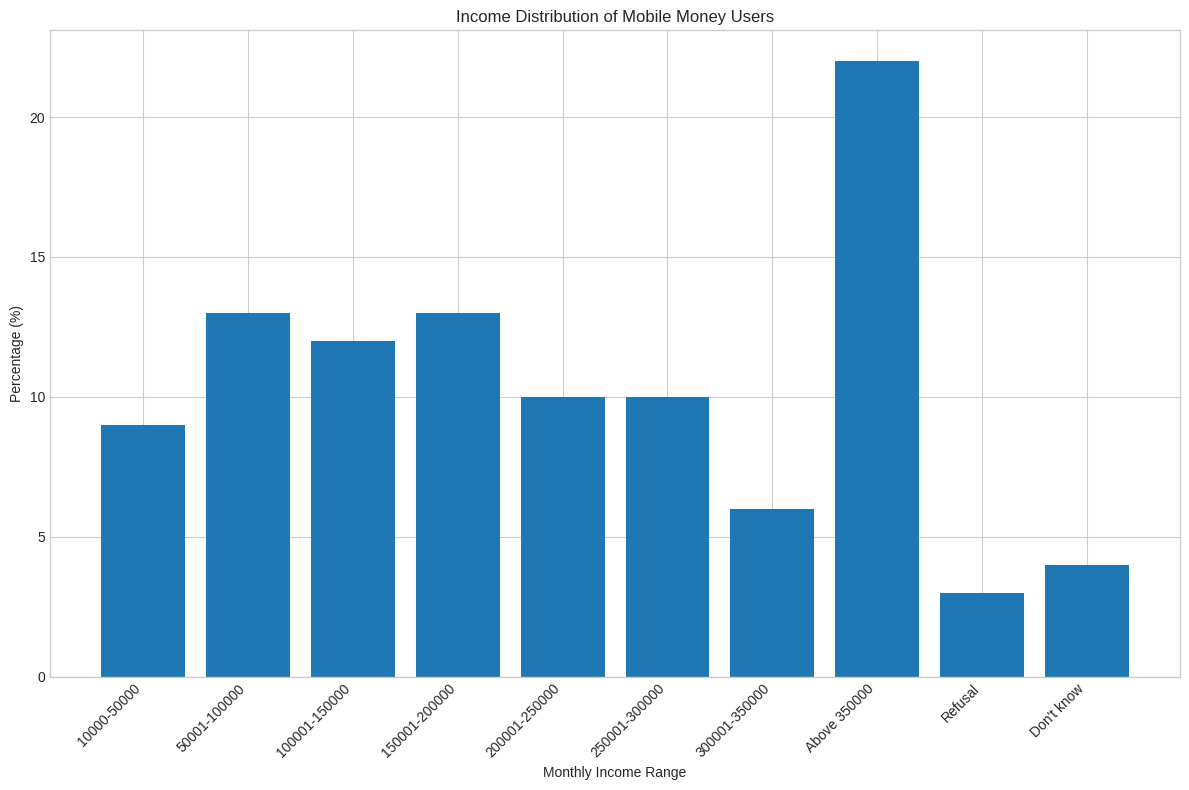

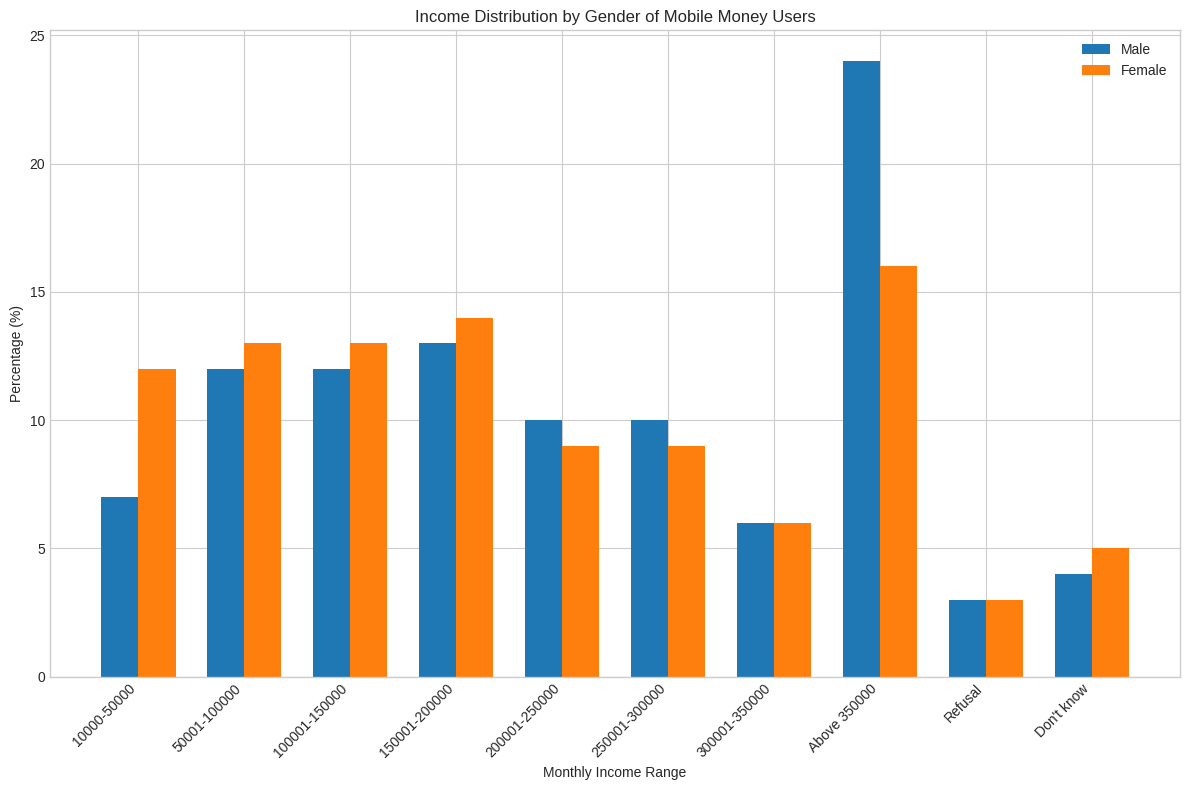

In [ ]:
end_user_income_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/end_user_income.csv")

if end_user_income_df is not None:
    try:
        plt.figure(figsize=(12, 8))

        # Check if required columns exist
        if all(col in end_user_income_df.columns for col in ['monthly_income_range', 'total_percentage']):
            # Create a bar chart of income distribution
            plt.bar(end_user_income_df['monthly_income_range'], end_user_income_df['total_percentage'])

            plt.xlabel('Monthly Income Range')
            plt.ylabel('Percentage (%)')
            plt.title('Income Distribution of Mobile Money Users')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # If gender breakdown available, create a grouped bar chart
            if all(col in end_user_income_df.columns for col in ['male_percentage', 'female_percentage']):
                plt.figure(figsize=(12, 8))

                x = np.arange(len(end_user_income_df['monthly_income_range']))
                width = 0.35

                plt.bar(x - width/2, end_user_income_df['male_percentage'], width, label='Male')
                plt.bar(x + width/2, end_user_income_df['female_percentage'], width, label='Female')

                plt.xlabel('Monthly Income Range')
                plt.ylabel('Percentage (%)')
                plt.title('Income Distribution by Gender of Mobile Money Users')
                plt.xticks(x, end_user_income_df['monthly_income_range'], rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"Error analyzing end user income: {str(e)}")

In [ ]:
poverty_df = load_and_examine_file(f"{DATA_PATH}UBoS/Distribution_of_Poverty_in_Uganda_across_regions_2016_17.xlsx")

if poverty_df is not None:
    try:
        # Attempt to reshape the data for analysis if needed
        # Since we don't know the exact structure, this is a template

        # Example: Create a bar chart of poverty rates by region
        plt.figure(figsize=(12, 6))

        # Assuming poverty_df has 'Region' and 'Poverty_Rate' columns
        if 'Region' in poverty_df.columns and 'Poverty_Rate' in poverty_df.columns:
            # Sort regions by poverty rate
            poverty_df = poverty_df.sort_values('Poverty_Rate', ascending=False)

            plt.bar(poverty_df['Region'], poverty_df['Poverty_Rate'])
            plt.xlabel('Region')
            plt.ylabel('Poverty Rate (%)')
            plt.title('Poverty Rates by Region in Uganda')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("Poverty dataframe does not have expected columns format. Manual analysis needed.")
    except Exception as e:
        print(f"Error analyzing regional poverty data: {str(e)}")

Loading: Distribution_of_Poverty_in_Uganda_across_regions_2016_17.xlsx
✓ Successfully loaded with shape: (15, 3)
Poverty dataframe does not have expected columns format. Manual analysis needed.


<Figure size 1200x600 with 0 Axes>

In [ ]:
try:
    # This would depend on the structure of your agent_demographics_df
    if agent_demographics_df is not None and 'region' in agent_demographics_df.columns.str.lower():
        region_col = agent_demographics_df.columns[agent_demographics_df.columns.str.lower() == 'region'][0]
        percentage_col = [col for col in agent_demographics_df.columns if 'percentage' in col.lower()][0]

        if percentage_col:
            plt.figure(figsize=(12, 6))

            # Group by region and calculate percentages
            region_data = agent_demographics_df[agent_demographics_df['demographic_category'] == 'Region']

            plt.bar(region_data['segment'], region_data[percentage_col])
            plt.xlabel('Region')
            plt.ylabel('Percentage (%)')
            plt.title('Mobile Money Agent Distribution by Region')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    else:
        print("No regional data available in the agent demographics dataset.")
except Exception as e:
    print(f"Error analyzing regional agent distribution: {str(e)}")

No regional data available in the agent demographics dataset.


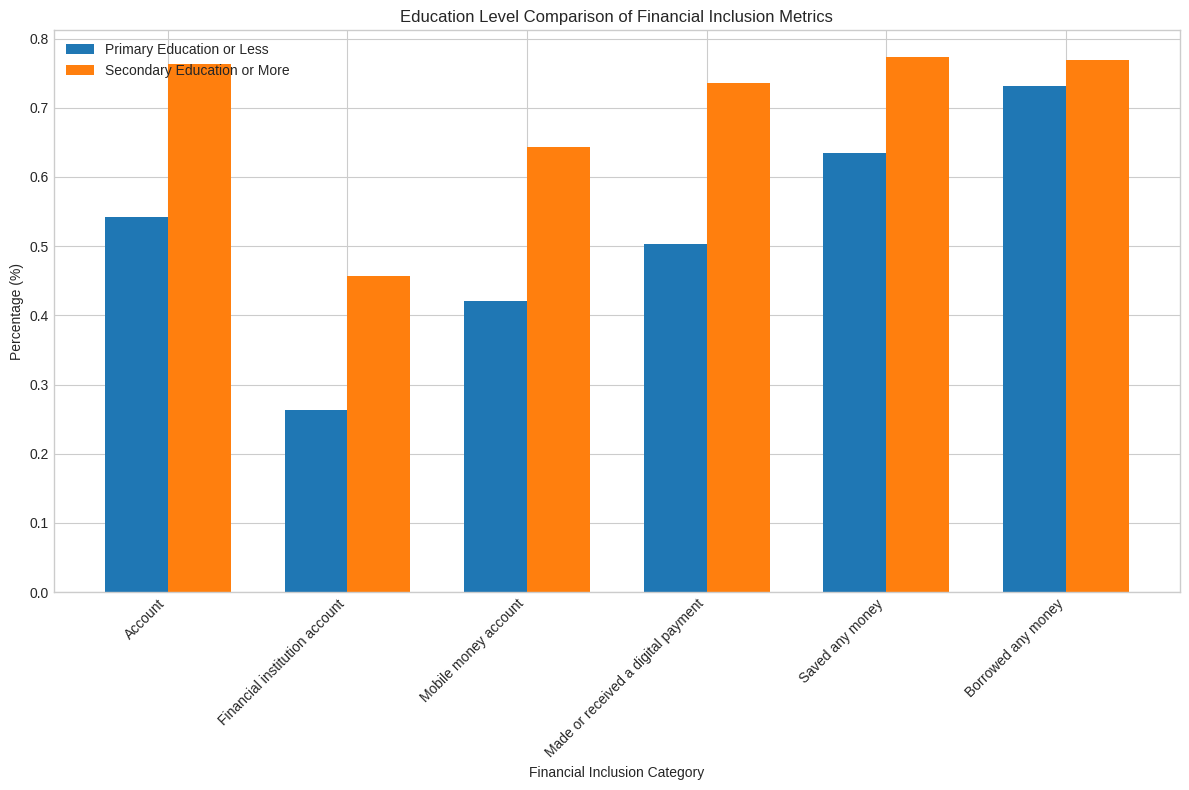

Education gap analysis in financial inclusion:


Category  Primary Edu or Less (%)  \
3  Made or received a digital payment                 0.502649   
2                Mobile money account                 0.420654   
0                             Account                 0.542593   
1       Financial institution account                 0.262660   
4                     Saved any money                 0.634693   
5                  Borrowed any money                 0.731633   

   Secondary Edu or More (%)  Education Gap (S-P)  
3                   0.735987             0.233339  
2                   0.642787             0.222132  
0                   0.763483             0.220890  
1                   0.457214             0.194553  
4                   0.773288             0.138595  
5                   0.768590             0.036957

In [ ]:
try:
    if uganda_data is not None and len(uganda_data) > 0:
        recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

        # Analyze education level differences in financial inclusion
        education_metrics = [
            ('Account', 'Account, primary education or less (% ages 15+)', 'Account, secondary education or more (% ages 15+)'),
            ('Financial institution account', 'Financial institution account, primary education or less (% ages 15+)', 'Financial institution account, secondary education or more (% ages 15+)'),
            ('Mobile money account', 'Mobile money account, primary education or less (% ages 15+)', 'Mobile money account, secondary education or more (% ages 15+)'),
            ('Made or received a digital payment', 'Made or received a digital payment, primary education or less (% ages 15+)', 'Made or received a digital payment, secondary education or more (% ages 15+)'),
            ('Saved any money', 'Saved any money, primary education or less (% ages 15+)', 'Saved any money, secondary education or more (% ages 15+)'),
            ('Borrowed any money', 'Borrowed any money, primary education or less (% ages 15+)', 'Borrowed any money, secondary education or more (% ages 15+)')
        ]

        # Create data for plotting
        categories = []
        primary_values = []
        secondary_values = []

        for category, primary_col, secondary_col in education_metrics:
            if primary_col in recent_data.index and secondary_col in recent_data.index:
                categories.append(category)
                primary_values.append(recent_data[primary_col])
                secondary_values.append(recent_data[secondary_col])

        # Plot the education level comparison
        if categories:
            plt.figure(figsize=(12, 8))

            x = np.arange(len(categories))
            width = 0.35

            plt.bar(x - width/2, primary_values, width, label='Primary Education or Less')
            plt.bar(x + width/2, secondary_values, width, label='Secondary Education or More')

            plt.xlabel('Financial Inclusion Category')
            plt.ylabel('Percentage (%)')
            plt.title('Education Level Comparison of Financial Inclusion Metrics')
            plt.xticks(x, categories, rotation=45, ha='right')
            plt.legend()
            plt.tight_layout()
            plt.show()

            # Calculate and display education level gaps
            education_gap = pd.DataFrame({
                'Category': categories,
                'Primary Edu or Less (%)': primary_values,
                'Secondary Edu or More (%)': secondary_values,
                'Education Gap (S-P)': [s - p for s, p in zip(secondary_values, primary_values)]
            })

            print("Education gap analysis in financial inclusion:")
            display(education_gap.sort_values('Education Gap (S-P)', ascending=False))
except Exception as e:
    print(f"Error analyzing education levels and financial inclusion: {str(e)}")

Loading: agent_education.csv
✓ Successfully loaded with shape: (8, 2)


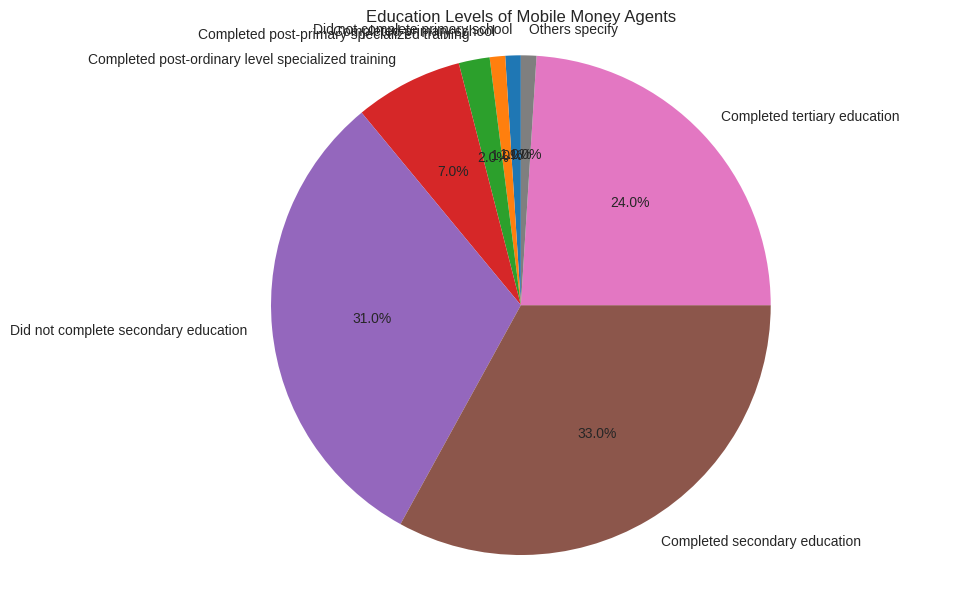

In [ ]:
# Agent education level analysis
agent_education_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/agent_education.csv")

if agent_education_df is not None:
    try:
        plt.figure(figsize=(10, 6))

        # Check if required columns exist
        if all(col in agent_education_df.columns for col in ['education_level', 'percentage']):
            # Create a pie chart of education levels
            plt.pie(agent_education_df['percentage'],
                   labels=agent_education_df['education_level'],
                   autopct='%1.1f%%',
                   startangle=90)
            plt.axis('equal')
            plt.title('Education Levels of Mobile Money Agents')
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error analyzing agent education levels: {str(e)}")

Loading: end_user_education.csv
✓ Successfully loaded with shape: (9, 4)


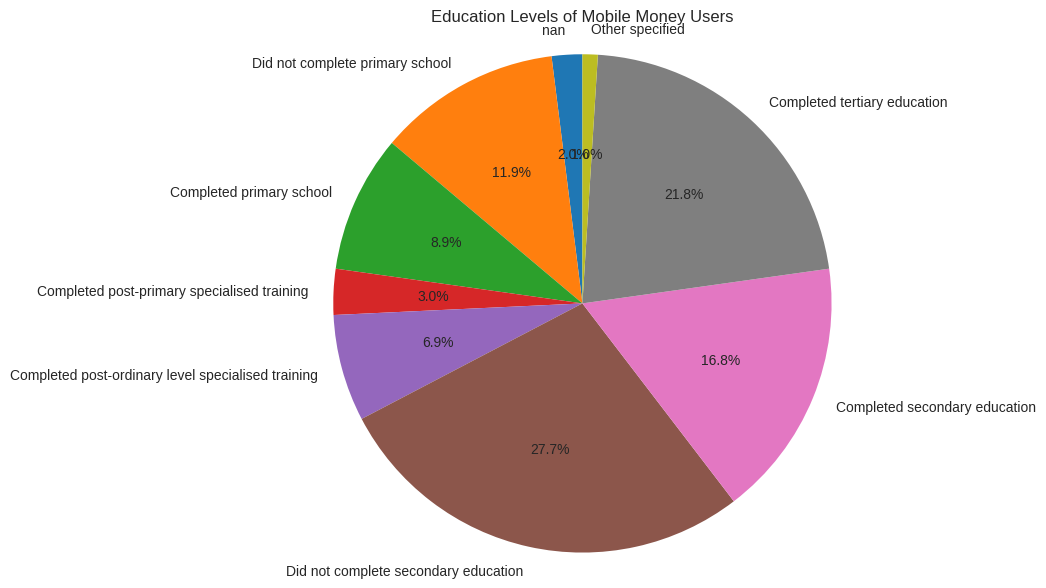

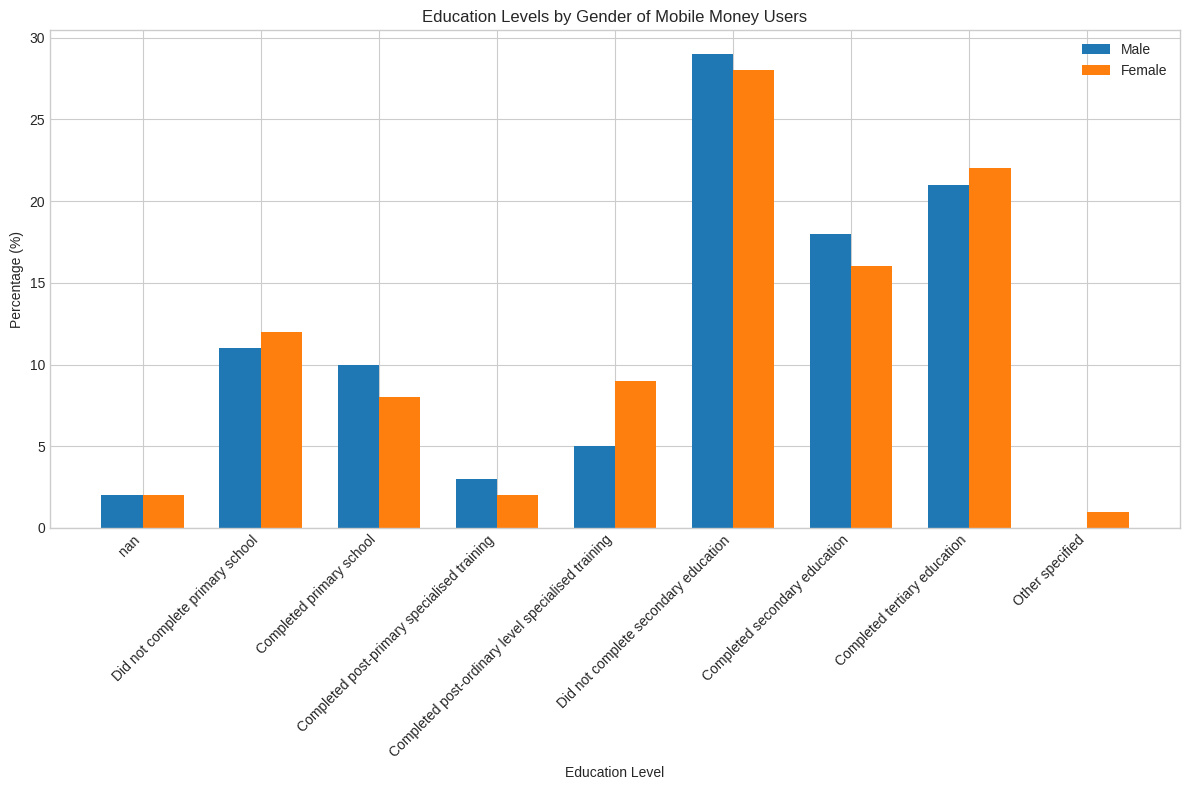

In [ ]:
end_user_education_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/end_user_education.csv")

if end_user_education_df is not None:
    try:
        plt.figure(figsize=(10, 6))

        # Check if required columns exist
        if all(col in end_user_education_df.columns for col in ['education_level', 'total_percentage']):
            # Create a pie chart of education levels
            plt.pie(end_user_education_df['total_percentage'],
                   labels=end_user_education_df['education_level'],
                   autopct='%1.1f%%',
                   startangle=90)
            plt.axis('equal')
            plt.title('Education Levels of Mobile Money Users')
            plt.tight_layout()
            plt.show()

            # If gender breakdown available, create a grouped bar chart
            if all(col in end_user_education_df.columns for col in ['male_percentage', 'female_percentage']):
                plt.figure(figsize=(12, 8))

                x = np.arange(len(end_user_education_df['education_level']))
                width = 0.35

                plt.bar(x - width/2, end_user_education_df['male_percentage'], width, label='Male')
                plt.bar(x + width/2, end_user_education_df['female_percentage'], width, label='Female')

                plt.xlabel('Education Level')
                plt.ylabel('Percentage (%)')
                plt.title('Education Levels by Gender of Mobile Money Users')
                plt.xticks(x, end_user_education_df['education_level'], rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"Error analyzing end user education levels: {str(e)}")

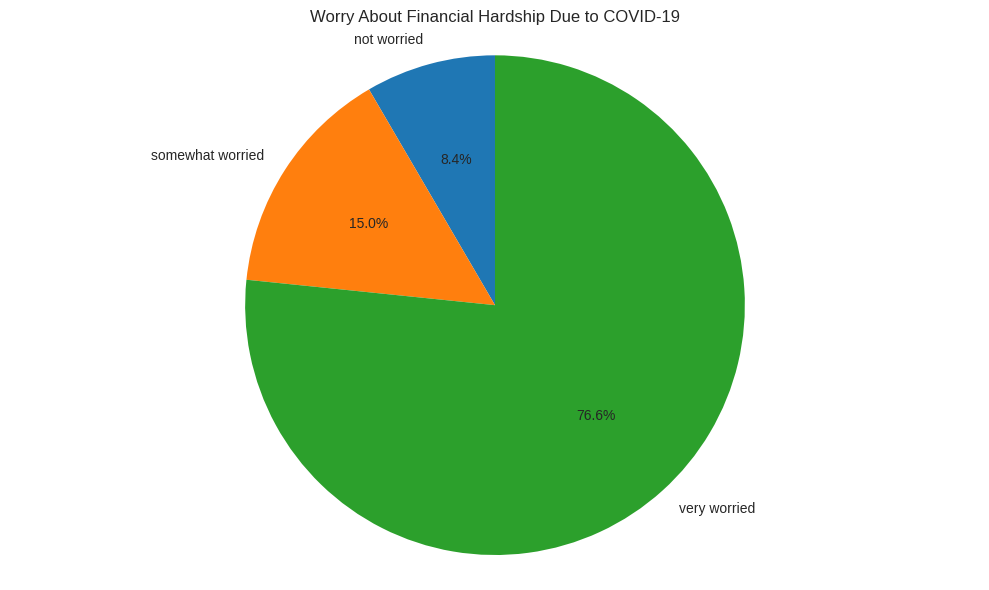

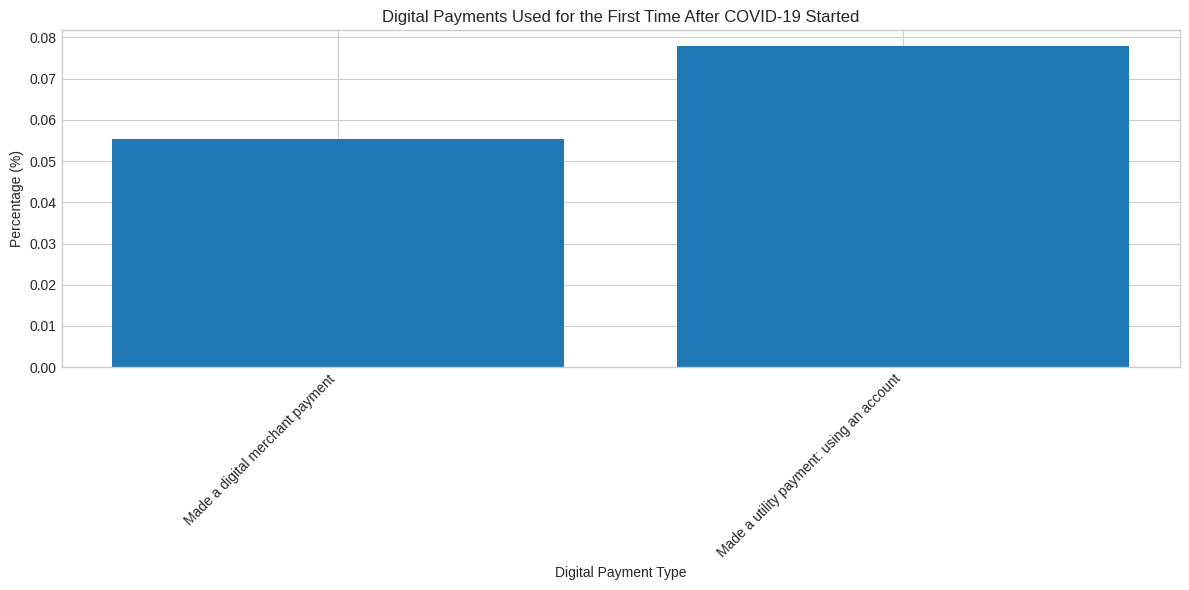

In [ ]:
try:
    if uganda_data is not None and len(uganda_data) > 0:
        recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

        # COVID-19 financial hardship analysis
        covid_cols = [
            'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: not worried (% age 15+)',
            'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: somewhat worried (% age 15+)',
            'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: very worried (% age 15+)'
        ]

        # Filter to columns that exist
        existing_covid_cols = [col for col in covid_cols if col in recent_data.index]

        if existing_covid_cols:
            # Create labels and values for plotting
            covid_labels = [col.split(': ')[1].split(' (% age')[0] for col in existing_covid_cols]
            covid_values = [recent_data[col] for col in existing_covid_cols]

            plt.figure(figsize=(10, 6))
            plt.pie(covid_values, labels=covid_labels, autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
            plt.title('Worry About Financial Hardship Due to COVID-19')
            plt.tight_layout()
            plt.show()

        # COVID-19 impact on digital payments
        covid_payment_cols = [
            'Made a digital in-store merchant payment for the first time after COVID-19 started (% age 15+)',
            'Made a digital online payment for an online purchase for the first time after COVID-19 started (% age 15+)',
            'Made a digital merchant payment for the first time after COVID-19 started (% age 15+)',
            'Made a utility payment: using an account for the first time after COVID-19 started (% age 15+)'
        ]

        # Filter to columns that exist
        existing_covid_payment_cols = [col for col in covid_payment_cols if col in recent_data.index]

        if existing_covid_payment_cols:
            # Create labels and values for plotting
            covid_payment_labels = [col.split(' for the first time after COVID-19 started')[0] for col in existing_covid_payment_cols]
            covid_payment_values = [recent_data[col] for col in existing_covid_payment_cols]

            plt.figure(figsize=(12, 6))
            plt.bar(covid_payment_labels, covid_payment_values)
            plt.xlabel('Digital Payment Type')
            plt.ylabel('Percentage (%)')
            plt.title('Digital Payments Used for the First Time After COVID-19 Started')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
except Exception as e:
    print(f"Error analyzing COVID-19 impact on financial behaviors: {str(e)}")

Loading: agent_business_age.csv
✓ Successfully loaded with shape: (6, 4)


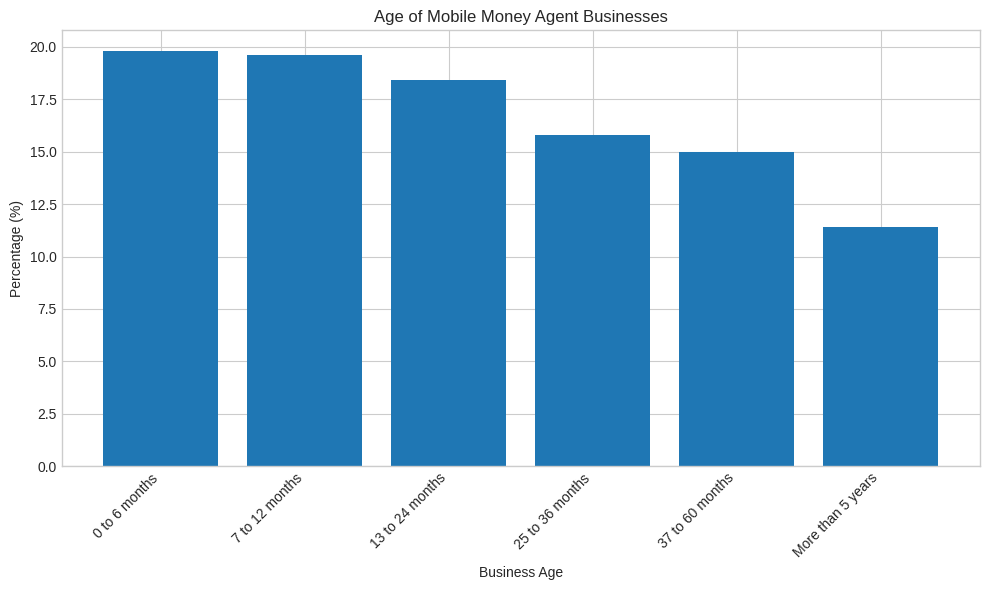

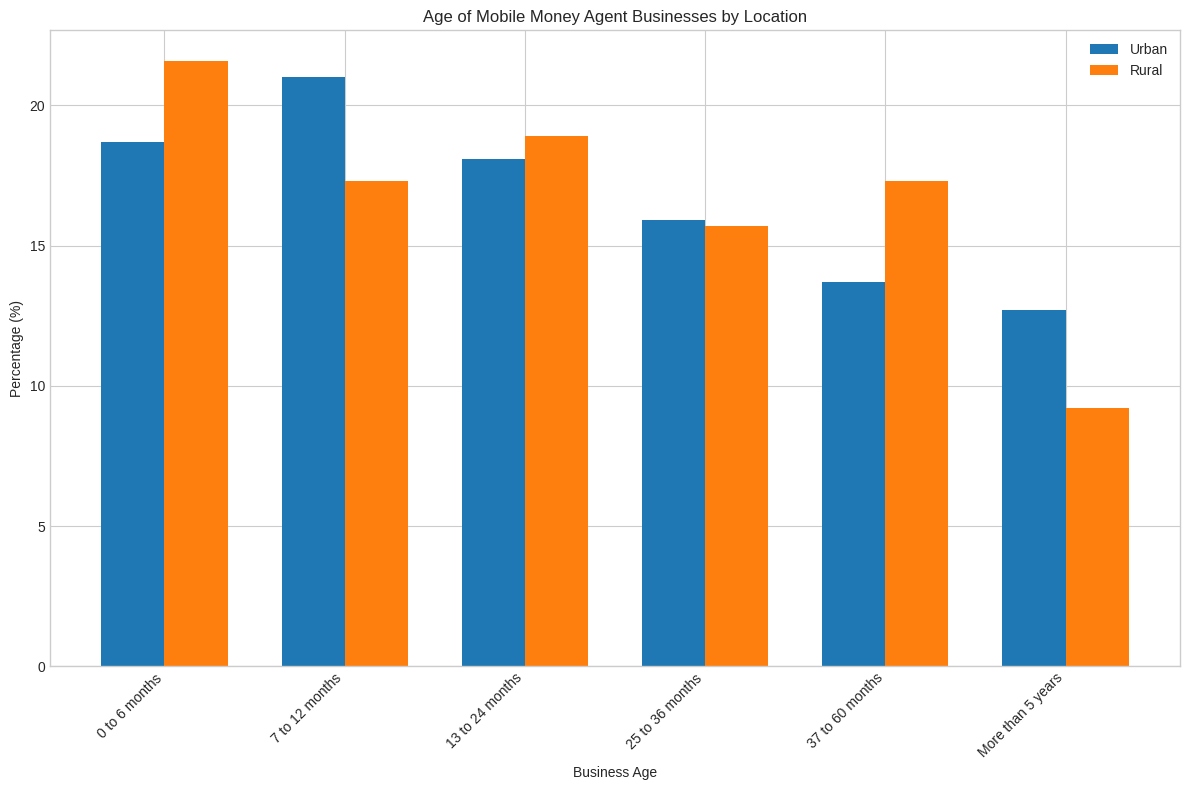

In [ ]:
agent_business_age_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/agent_business_age.csv")

if agent_business_age_df is not None:
    try:
        plt.figure(figsize=(10, 6))

        # Check if required columns exist
        if all(col in agent_business_age_df.columns for col in ['duration', 'total_percentage']):
            # Create a bar chart of business age
            plt.bar(agent_business_age_df['duration'], agent_business_age_df['total_percentage'])

            plt.xlabel('Business Age')
            plt.ylabel('Percentage (%)')
            plt.title('Age of Mobile Money Agent Businesses')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # If urban/rural breakdown available, create a grouped bar chart
            if all(col in agent_business_age_df.columns for col in ['urban_percentage', 'rural_percentage']):
                plt.figure(figsize=(12, 8))

                x = np.arange(len(agent_business_age_df['duration']))
                width = 0.35

                plt.bar(x - width/2, agent_business_age_df['urban_percentage'], width, label='Urban')
                plt.bar(x + width/2, agent_business_age_df['rural_percentage'], width, label='Rural')

                plt.xlabel('Business Age')
                plt.ylabel('Percentage (%)')
                plt.title('Age of Mobile Money Agent Businesses by Location')
                plt.xticks(x, agent_business_age_df['duration'], rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"Error analyzing agent business age: {str(e)}")

Loading: customer_volume.csv
✓ Successfully loaded with shape: (6, 4)


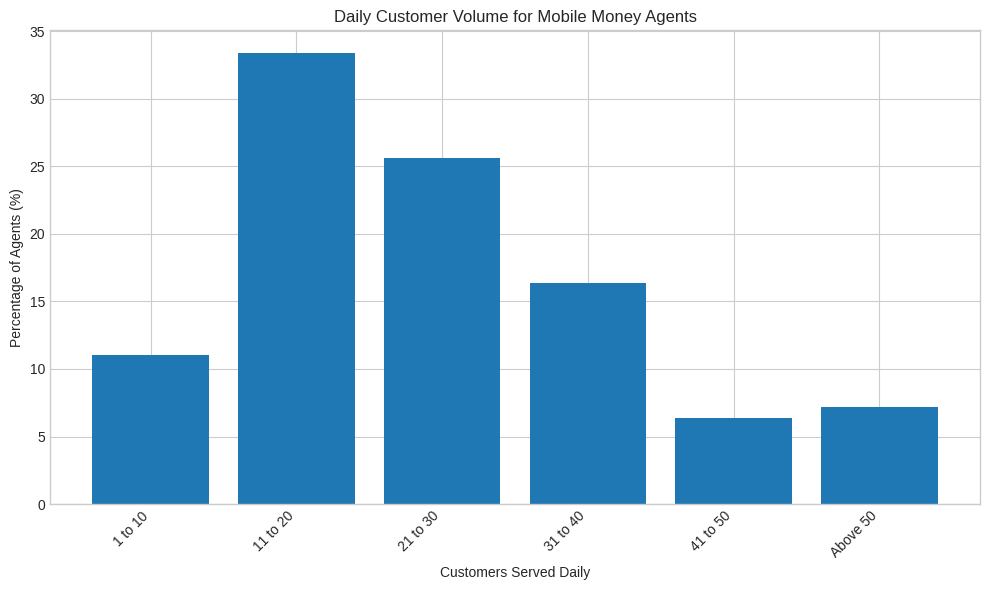

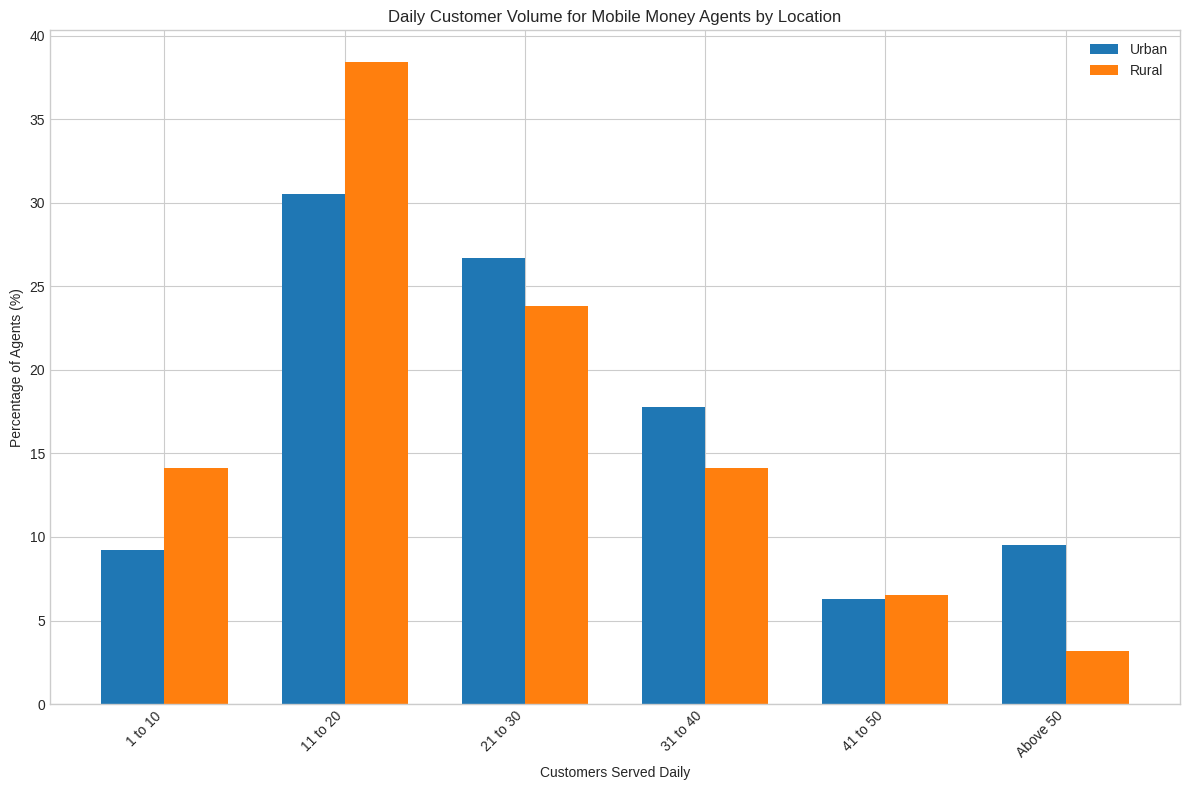

In [ ]:
# Customer volume analysis
customer_volume_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/customer_volume.csv")

if customer_volume_df is not None:
    try:
        plt.figure(figsize=(10, 6))

        # Check if required columns exist
        if all(col in customer_volume_df.columns for col in ['customers_served_daily', 'overall_percentage']):
            # Create a bar chart of customer volume
            plt.bar(customer_volume_df['customers_served_daily'], customer_volume_df['overall_percentage'])

            plt.xlabel('Customers Served Daily')
            plt.ylabel('Percentage of Agents (%)')
            plt.title('Daily Customer Volume for Mobile Money Agents')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # If urban/rural breakdown available, create a grouped bar chart
            if all(col in customer_volume_df.columns for col in ['urban_percentage', 'rural_percentage']):
                plt.figure(figsize=(12, 8))

                x = np.arange(len(customer_volume_df['customers_served_daily']))
                width = 0.35

                plt.bar(x - width/2, customer_volume_df['urban_percentage'], width, label='Urban')
                plt.bar(x + width/2, customer_volume_df['rural_percentage'], width, label='Rural')

                plt.xlabel('Customers Served Daily')
                plt.ylabel('Percentage of Agents (%)')
                plt.title('Daily Customer Volume for Mobile Money Agents by Location')
                plt.xticks(x, customer_volume_df['customers_served_daily'], rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"Error analyzing customer volume: {str(e)}")

Loading: float_replenishment.csv
✓ Successfully loaded with shape: (4, 4)


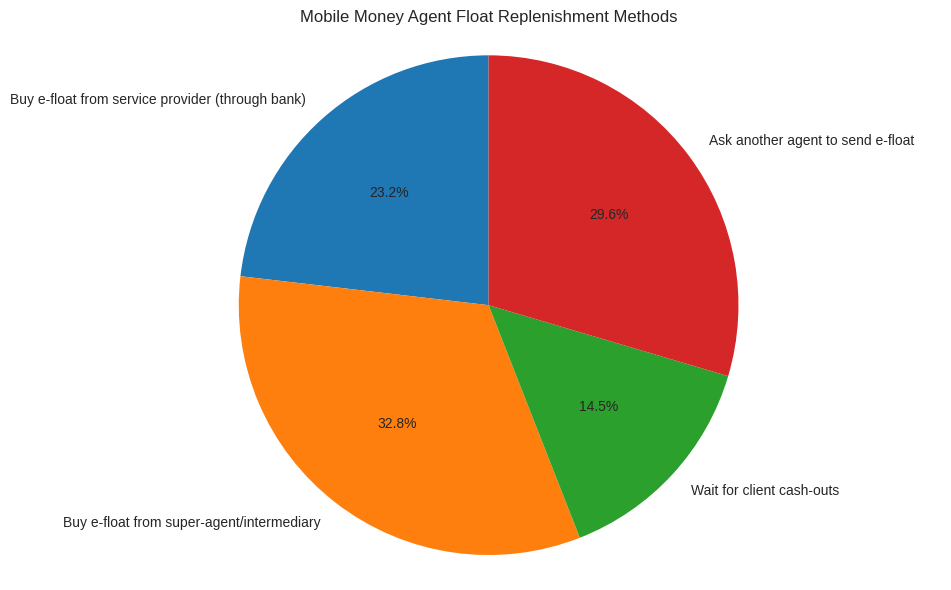

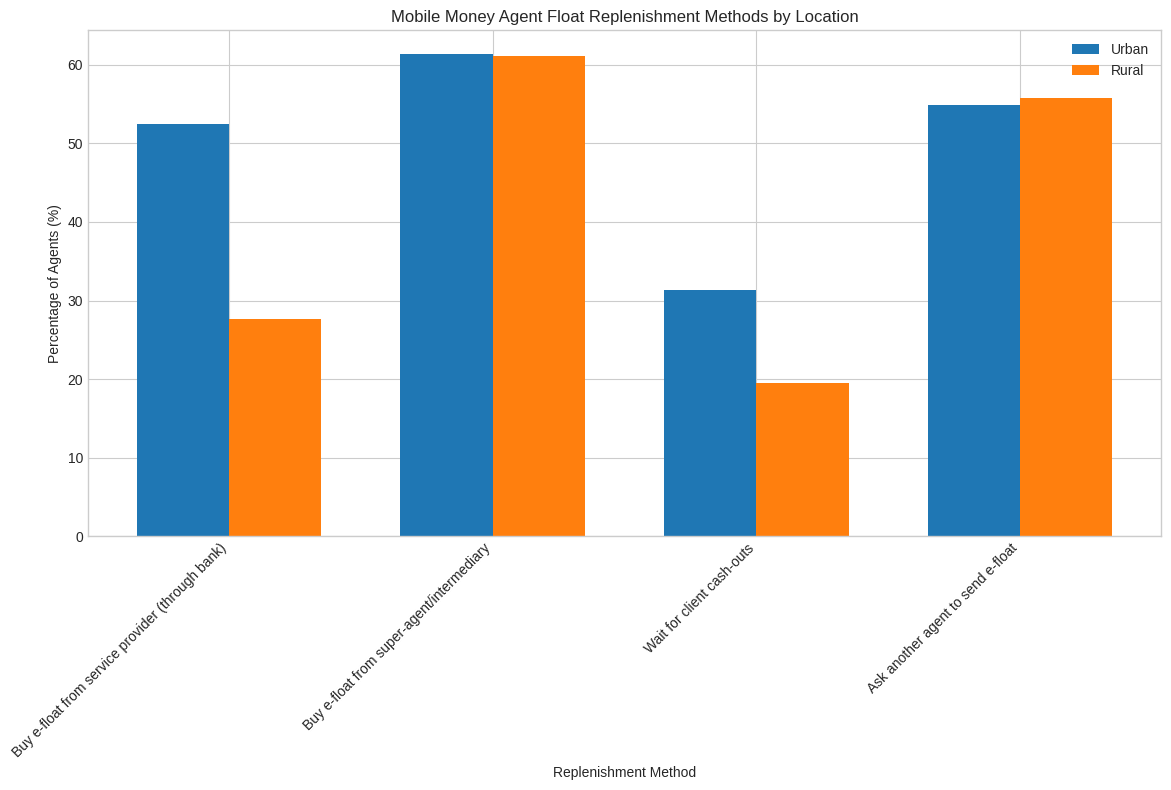

In [ ]:
# Float replenishment analysis
float_replenishment_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/float_replenishment.csv")

if float_replenishment_df is not None:
    try:
        plt.figure(figsize=(10, 6))

        # Check if required columns exist
        if all(col in float_replenishment_df.columns for col in ['replenishment_method', 'total_percentage']):
            # Create a pie chart of replenishment methods
            plt.pie(float_replenishment_df['total_percentage'],
                   labels=float_replenishment_df['replenishment_method'],
                   autopct='%1.1f%%',
                   startangle=90)
            plt.axis('equal')
            plt.title('Mobile Money Agent Float Replenishment Methods')
            plt.tight_layout()
            plt.show()

            # If urban/rural breakdown available, create a grouped bar chart
            if all(col in float_replenishment_df.columns for col in ['urban_percentage', 'rural_percentage']):
                plt.figure(figsize=(12, 8))

                x = np.arange(len(float_replenishment_df['replenishment_method']))
                width = 0.35

                plt.bar(x - width/2, float_replenishment_df['urban_percentage'], width, label='Urban')
                plt.bar(x + width/2, float_replenishment_df['rural_percentage'], width, label='Rural')

                plt.xlabel('Replenishment Method')
                plt.ylabel('Percentage of Agents (%)')
                plt.title('Mobile Money Agent Float Replenishment Methods by Location')
                plt.xticks(x, float_replenishment_df['replenishment_method'], rotation=45, ha='right')
                plt.legend()
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"Error analyzing float replenishment methods: {str(e)}")

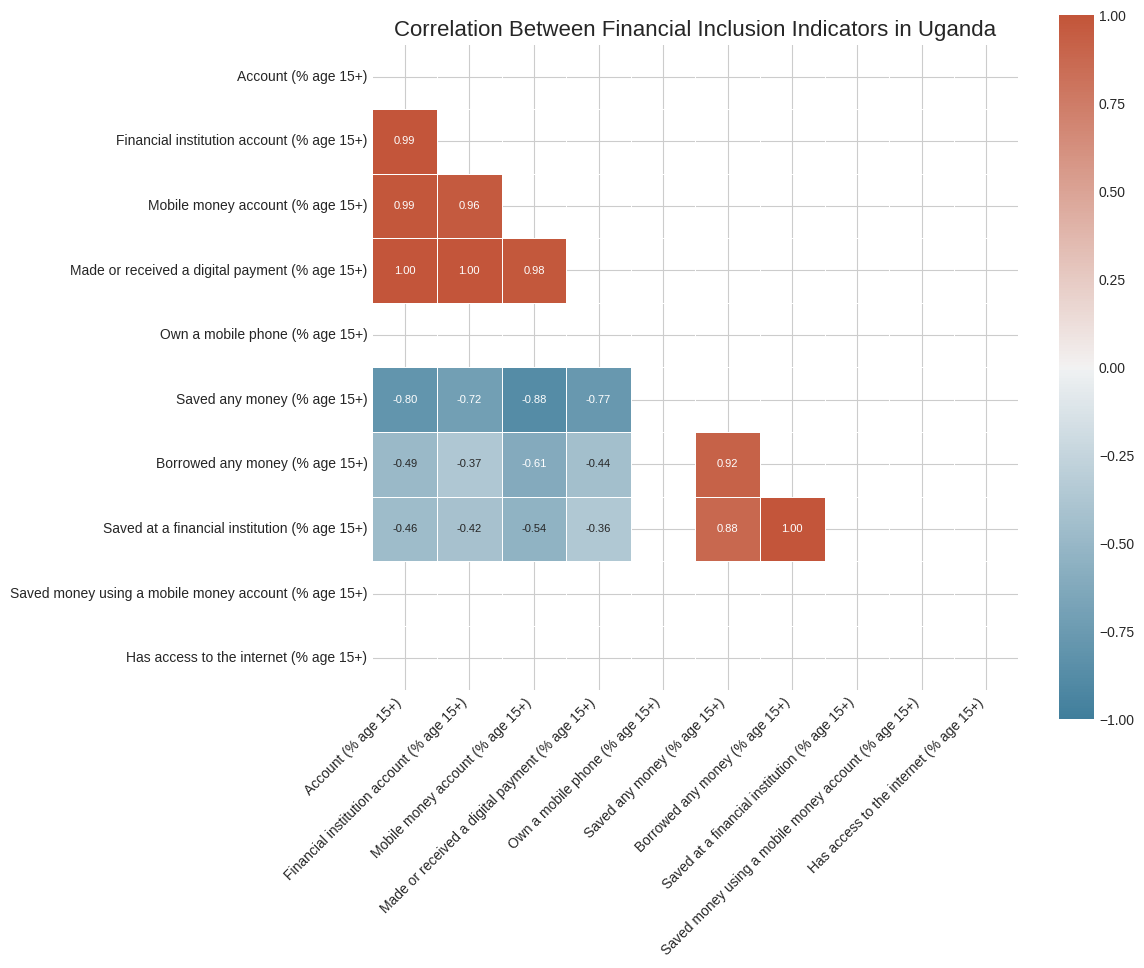

Correlation matrix for key financial inclusion indicators:


Account (% age 15+)  \
Account (% age 15+)                                            1.000000   
Financial institution account (% age 15+)                      0.994935   
Mobile money account (% age 15+)                               0.988890   
Made or received a digital payment (% age 15+)                 0.998801   
Own a mobile phone (% age 15+)                                      NaN   
Saved any money (% age 15+)                                   -0.797097   
Borrowed any money (% age 15+)                                -0.486791   
Saved at a financial institution (% age 15+)                  -0.463958   
Saved money using a mobile money account (% age...                  NaN   
Has access to the internet (% age 15+)                              NaN   

                                                    Financial institution account (% age 15+)  \
Account (% age 15+)                                                                  0.994935   
Financial institution account (% age 15+)                                            1.000000   
Mobile money account (% age 15+)                                                     0.962719   
Made or received a digital payment (% age 15+)                                       0.997132   
Own a mobile phone (% age 15+)                                                            NaN   
Saved any money (% age 15+)                                                         -0.715792   
Borrowed any money (% age 15+)                                                      -0.374352   
Saved at a financial institution (% age 15+)                                        -0.421742   
Saved money using a mobile money account (% age...                                        NaN   
Has access to the internet (% age 15+)                                                    NaN   

                                                    Mobile money account (% age 15+)  \
Account (% age 15+)                                                         0.988890   
Financial institution account (% age 15+)                                   0.962719   
Mobile money account (% age 15+)                                            1.000000   
Made or received a digital payment (% age 15+)                              0.980429   
Own a mobile phone (% age 15+)                                                   NaN   
Saved any money (% age 15+)                                                -0.878003   
Borrowed any money (% age 15+)                                             -0.611230   
Saved at a financial institution (% age 15+)                               -0.539985   
Saved money using a mobile money account (% age...                               NaN   
Has access to the internet (% age 15+)                                           NaN   

                                                    Made or received a digital payment (% age 15+)  \
Account (% age 15+)                                                                       0.998801   
Financial institution account (% age 15+)                                                 0.997132   
Mobile money account (% age 15+)                                                          0.980429   
Made or received a digital payment (% age 15+)                                            1.000000   
Own a mobile phone (% age 15+)                                                                 NaN   
Saved any money (% age 15+)                                                              -0.766585   
Borrowed any money (% age 15+)                                                           -0.443452   
Saved at a financial institution (% age 15+)                                             -0.363714   
Saved money using a mobile money account (% age...                                             NaN   
Has access to the internet (% age 15+)                                                         NaN   

                                                    Own a mobile p

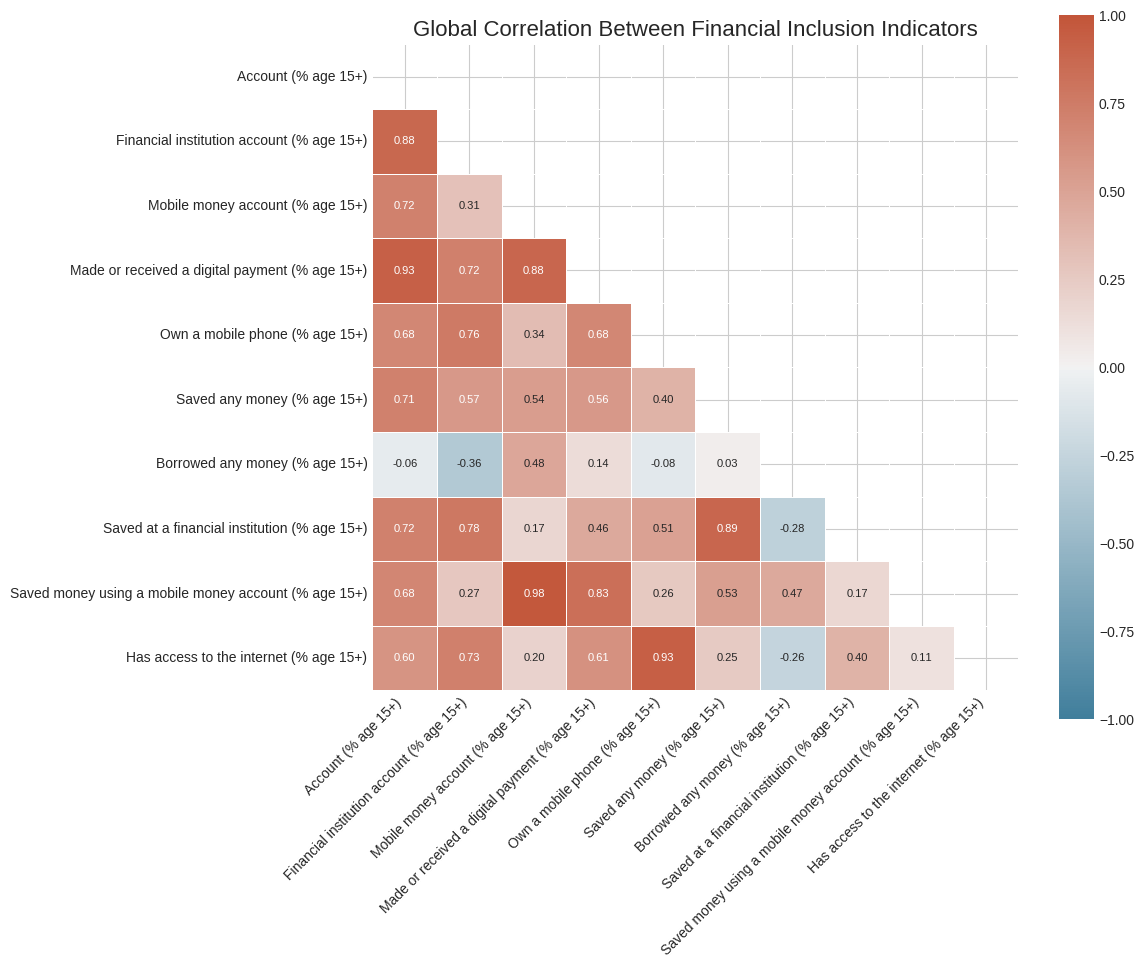

Global correlation matrix for key financial inclusion indicators:


Account (% age 15+)  \
Account (% age 15+)                                            1.000000   
Financial institution account (% age 15+)                      0.880378   
Mobile money account (% age 15+)                               0.718220   
Made or received a digital payment (% age 15+)                 0.928949   
Own a mobile phone (% age 15+)                                 0.675576   
Saved any money (% age 15+)                                    0.713461   
Borrowed any money (% age 15+)                                -0.057782   
Saved at a financial institution (% age 15+)                   0.715026   
Saved money using a mobile money account (% age...             0.681213   
Has access to the internet (% age 15+)                         0.597072   

                                                    Financial institution account (% age 15+)  \
Account (% age 15+)                                                                  0.880378   
Financial institution account (% age 15+)                                            1.000000   
Mobile money account (% age 15+)                                                     0.307739   
Made or received a digital payment (% age 15+)                                       0.719527   
Own a mobile phone (% age 15+)                                                       0.764309   
Saved any money (% age 15+)                                                          0.565204   
Borrowed any money (% age 15+)                                                      -0.356911   
Saved at a financial institution (% age 15+)                                         0.775008   
Saved money using a mobile money account (% age...                                   0.271242   
Has access to the internet (% age 15+)                                               0.725600   

                                                    Mobile money account (% age 15+)  \
Account (% age 15+)                                                         0.718220   
Financial institution account (% age 15+)                                   0.307739   
Mobile money account (% age 15+)                                            1.000000   
Made or received a digital payment (% age 15+)                              0.884847   
Own a mobile phone (% age 15+)                                              0.337617   
Saved any money (% age 15+)                                                 0.538264   
Borrowed any money (% age 15+)                                              0.484295   
Saved at a financial institution (% age 15+)                                0.174023   
Saved money using a mobile money account (% age...                          0.979016   
Has access to the internet (% age 15+)                                      0.201288   

                                                    Made or received a digital payment (% age 15+)  \
Account (% age 15+)                                                                       0.928949   
Financial institution account (% age 15+)                                                 0.719527   
Mobile money account (% age 15+)                                                          0.884847   
Made or received a digital payment (% age 15+)                                            1.000000   
Own a mobile phone (% age 15+)                                                            0.679030   
Saved any money (% age 15+)                                                               0.563968   
Borrowed any money (% age 15+)                                                            0.135527   
Saved at a financial institution (% age 15+)                                              0.462225   
Saved money using a mobile money account (% age...                                        0.830939   
Has access to the internet (% age 15+)                                                    0.611974   

                                                    Own a mobile p

In [ ]:
try:
    if uganda_data is not None and len(uganda_data) > 0:
        # Select key financial inclusion indicators
        key_indicators = [
            'Account (% age 15+)',
            'Financial institution account (% age 15+)',
            'Mobile money account (% age 15+)',
            'Made or received a digital payment (% age 15+)',
            'Own a mobile phone (% age 15+)',
            'Saved any money (% age 15+)',
            'Borrowed any money (% age 15+)',
            'Saved at a financial institution (% age 15+)',
            'Saved money using a mobile money account (% age 15+)',
            'Has access to the internet (% age 15+)'
        ]

        # Filter to indicators that exist in the data
        existing_indicators = [col for col in key_indicators if col in uganda_data.columns]

        if existing_indicators and len(existing_indicators) > 1:
            # Create correlation matrix
            corr_matrix = create_correlation_heatmap(
                uganda_data,
                cols=existing_indicators,
                title="Correlation Between Financial Inclusion Indicators in Uganda"
            )

            # Display the correlation values for reference
            print("Correlation matrix for key financial inclusion indicators:")
            display(corr_matrix)

            # If we have data across multiple countries, we can also analyze global correlations
            if 'Country name' in databank_df.columns and len(databank_df['Country name'].unique()) > 1:
                # Select the most recent year data for each country
                recent_year = databank_df['Year'].max()
                global_recent_data = databank_df[databank_df['Year'] == recent_year]

                # Filter to indicators that exist in the global data
                global_existing_indicators = [col for col in key_indicators if col in global_recent_data.columns]

                if global_existing_indicators and len(global_existing_indicators) > 1:
                    # Create correlation matrix for global data
                    global_corr_matrix = create_correlation_heatmap(
                        global_recent_data,
                        cols=global_existing_indicators,
                        title="Global Correlation Between Financial Inclusion Indicators"
                    )

                    # Display the global correlation values for reference
                    print("Global correlation matrix for key financial inclusion indicators:")
                    display(global_corr_matrix)
except Exception as e:
    print(f"Error creating correlation analysis: {str(e)}")

Loading: replenishment_challenges.csv
✓ Successfully loaded with shape: (8, 2)


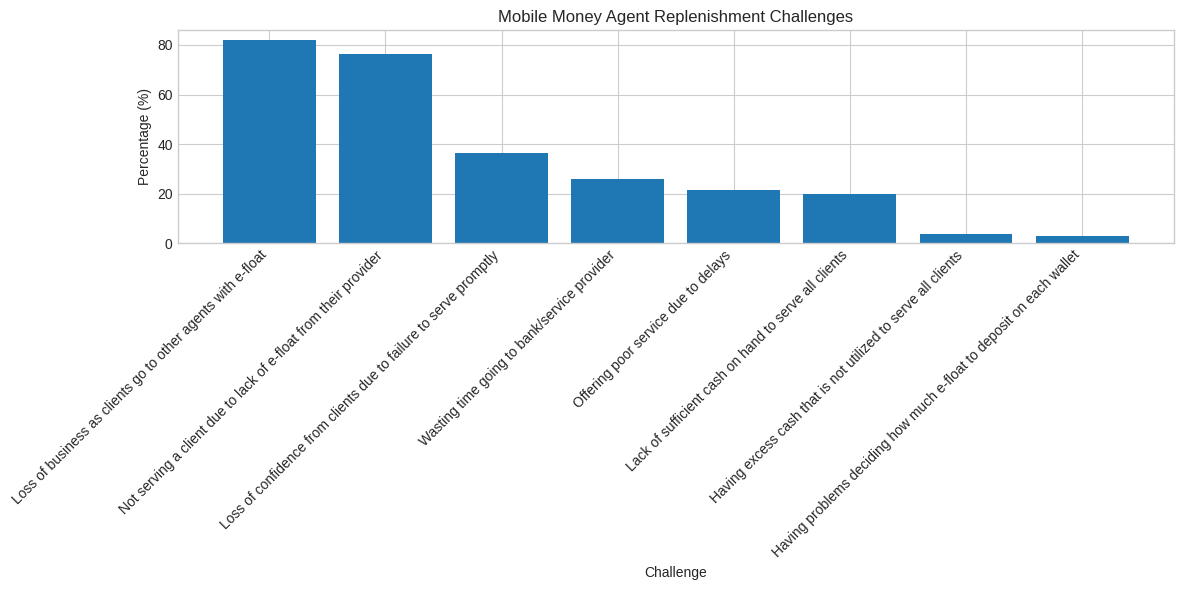

In [ ]:
replenishment_challenges_df = load_and_examine_file(f"{DATA_PATH}Interopperability-in-Mobile-Financial-Services-Final-Report/replenishment_challenges.csv")

if replenishment_challenges_df is not None:
    try:
        plt.figure(figsize=(12, 6))

        # Check if required columns exist
        if all(col in replenishment_challenges_df.columns for col in ['challenge', 'percentage']):
            # Sort the challenges by percentage
            replenishment_challenges_df = replenishment_challenges_df.sort_values('percentage', ascending=False)

            # Create a bar chart
            plt.bar(replenishment_challenges_df['challenge'], replenishment_challenges_df['percentage'])

            plt.xlabel('Challenge')
            plt.ylabel('Percentage (%)')
            plt.title('Mobile Money Agent Replenishment Challenges')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Error analyzing agent replenishment challenges: {str(e)}")

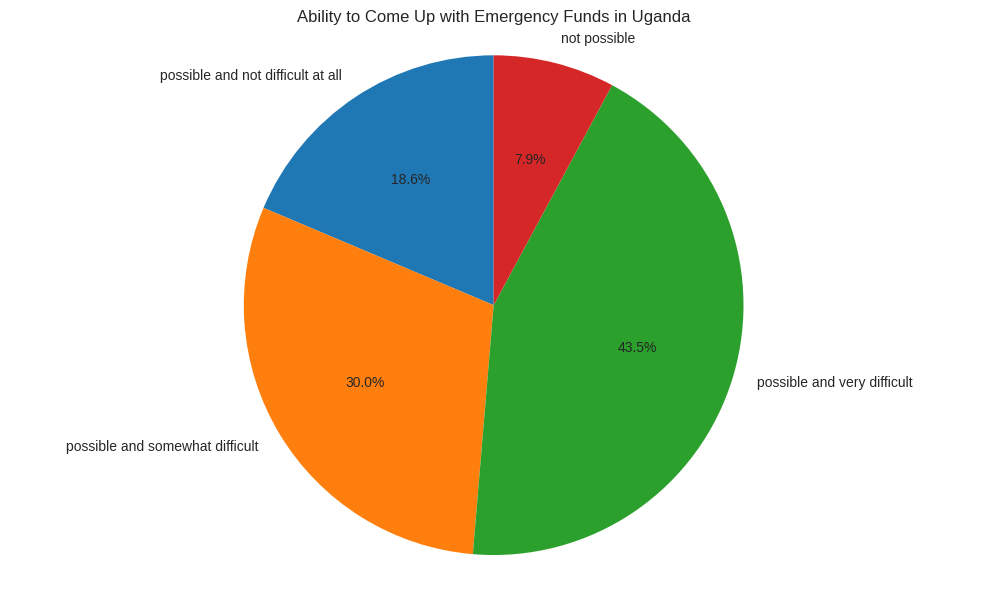

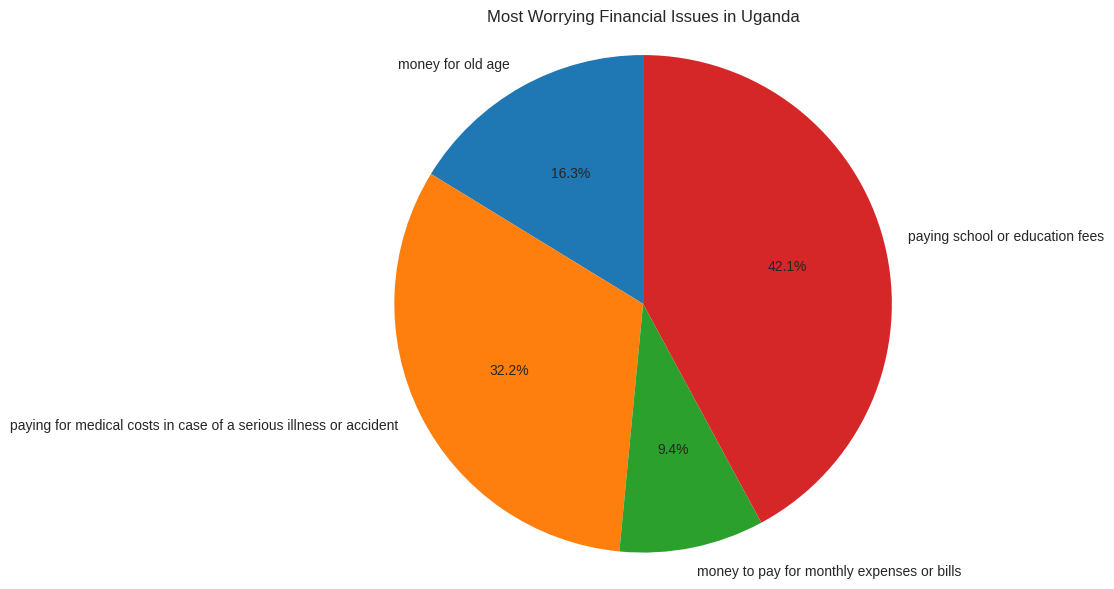

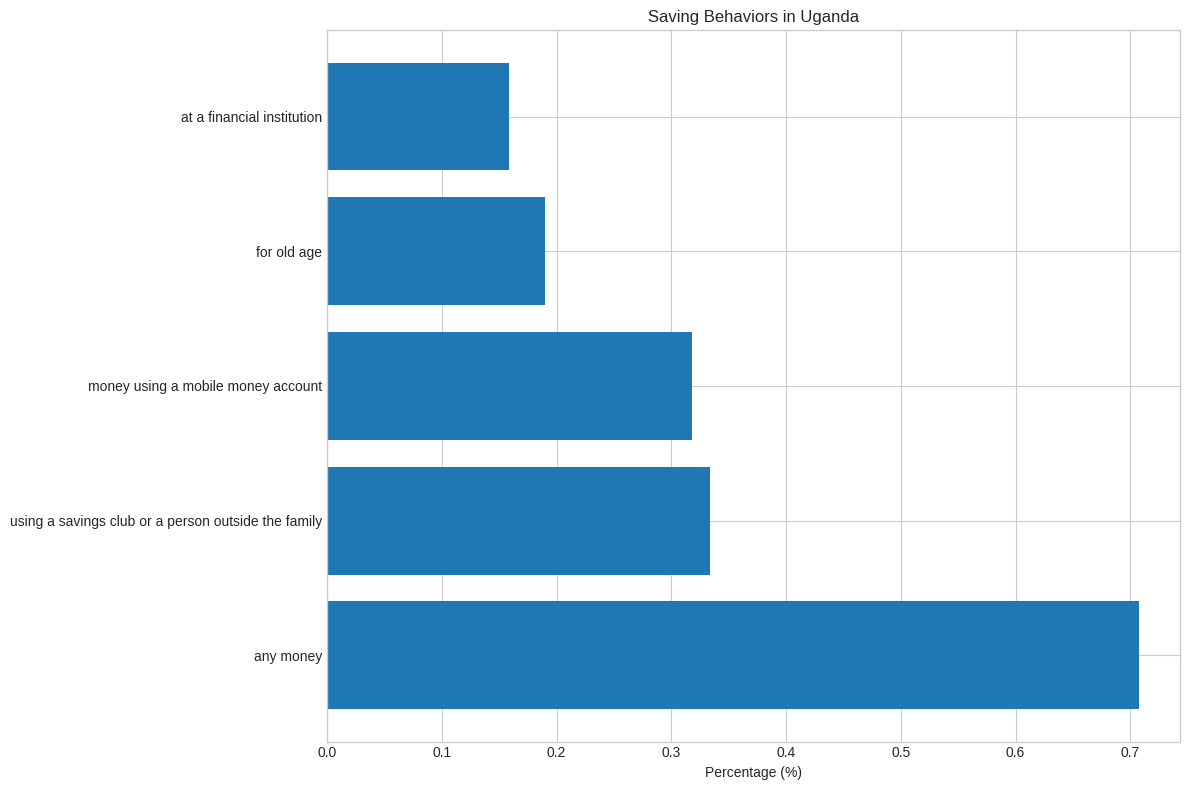

In [ ]:
try:
    if uganda_data is not None and len(uganda_data) > 0:
        recent_data = uganda_data.sort_values('Year', ascending=False).iloc[0].copy()

        # Analyze emergency fund access
        emergency_fund_cols = [
            'Coming up with emergency funds in 30 days: possible and not difficult at all (% age 15+)',
            'Coming up with emergency funds in 30 days: possible and somewhat difficult (% age 15+)',
            'Coming up with emergency funds in 30 days: possible and very difficult (% age 15+)',
            'Coming up with emergency funds in 30 days: not possible (% age 15+)'
        ]

        # Filter to columns that exist
        existing_emergency_cols = [col for col in emergency_fund_cols if col in recent_data.index]

        if existing_emergency_cols:
            # Create labels and values for plotting
            emergency_labels = [col.split('Coming up with emergency funds in 30 days: ')[1].split(' (% age')[0] for col in existing_emergency_cols]
            emergency_values = [recent_data[col] for col in existing_emergency_cols]

            plt.figure(figsize=(10, 6))
            plt.pie(emergency_values, labels=emergency_labels, autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
            plt.title('Ability to Come Up with Emergency Funds in Uganda')
            plt.tight_layout()
            plt.show()

        # Analyze financial worries
        worry_columns = [
            'Most worrying financial issue: money for old age (% age 15+)',
            'Most worrying financial issue: paying for medical costs in case of a serious illness or accident (% age 15+)',
            'Most worrying financial issue: money to pay for monthly expenses or bills (% age 15+)',
            'Most worrying financial issue: paying school or education fees (% age 15+)'
        ]

        # Filter to columns that exist
        existing_worry_cols = [col for col in worry_columns if col in recent_data.index]

        if existing_worry_cols:
            # Create labels and values for plotting
            worry_labels = [col.split('Most worrying financial issue: ')[1].split(' (% age')[0] for col in existing_worry_cols]
            worry_values = [recent_data[col] for col in existing_worry_cols]

            plt.figure(figsize=(10, 6))
            plt.pie(worry_values, labels=worry_labels, autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
            plt.title('Most Worrying Financial Issues in Uganda')
            plt.tight_layout()
            plt.show()

        # Analyze saving behaviors
        saving_columns = [
            'Saved any money (% age 15+)',
            'Saved at a financial institution (% age 15+)',
            'Saved using a savings club or a person outside the family (% age 15+)',
            'Saved money using a mobile money account (% age 15+)',
            'Saved for old age (% age 15+)',
            'Saved for education or school fees (% age 15+)',
            'Saved to start, operate, or expand a farm or business (% age 15+)'
        ]

        # Filter to columns that exist
        existing_saving_cols = [col for col in saving_columns if col in recent_data.index]

        if existing_saving_cols:
            # Create labels and values for plotting
            saving_labels = [col.split('Saved ')[1].split(' (% age')[0] for col in existing_saving_cols]
            saving_values = [recent_data[col] for col in existing_saving_cols]

            # Sort for better visualization
            sorted_savings = sorted(zip(saving_labels, saving_values), key=lambda x: x[1], reverse=True)
            saving_labels, saving_values = zip(*sorted_savings)

            plt.figure(figsize=(12, 8))
            plt.barh(saving_labels, saving_values)
            plt.xlabel('Percentage (%)')
            plt.title('Saving Behaviors in Uganda')
            plt.tight_layout()
            plt.show()
except Exception as e:
    print(f"Error analyzing financial behaviors and worries: {str(e)}")